# House Price Prediction Kaggle dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)   #display all columns of the dataframe
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

## EDA

1. Missing Values
2. All features are Numeric
3. Categorical & Continuous Variables
4. Managing Outliers
5. Relationship between independent and dependent feature(SalePrice)

In [4]:
#Getting List of features which has missing values
features_null = []
for feature in data.columns:
    if data[feature].isnull().sum()>0:
        features_null.append(feature)
features_null

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [5]:
#Displaying feature name and the percentage of missing values
for feature in features_null:
    print(feature, np.round((data[feature].isnull().mean())*100,2), '  % missing values')

LotFrontage 17.74   % missing values
Alley 93.77   % missing values
MasVnrType 0.55   % missing values
MasVnrArea 0.55   % missing values
BsmtQual 2.53   % missing values
BsmtCond 2.53   % missing values
BsmtExposure 2.6   % missing values
BsmtFinType1 2.53   % missing values
BsmtFinType2 2.6   % missing values
Electrical 0.07   % missing values
FireplaceQu 47.26   % missing values
GarageType 5.55   % missing values
GarageYrBlt 5.55   % missing values
GarageFinish 5.55   % missing values
GarageQual 5.55   % missing values
GarageCond 5.55   % missing values
PoolQC 99.52   % missing values
Fence 80.75   % missing values
MiscFeature 96.3   % missing values


##### Since there are many missing values, let's see the relation b/w missing values and Sales Price(target variable).  
##### If there is no significant dependency, we can just remove the row of missing value, else we have to take that into account and handle in Feature Engineering

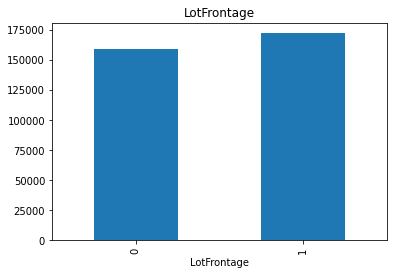

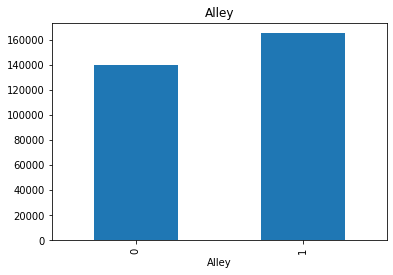

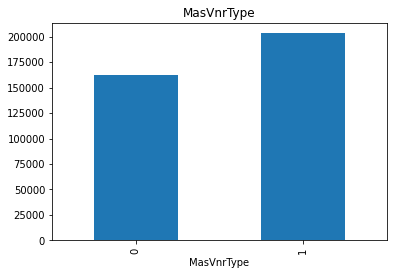

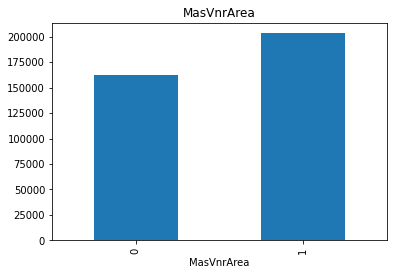

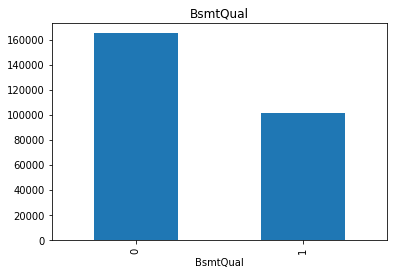

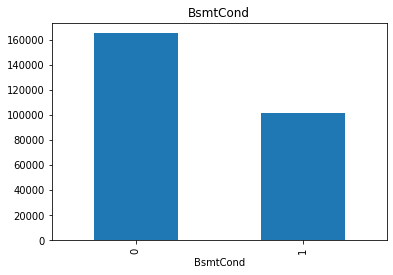

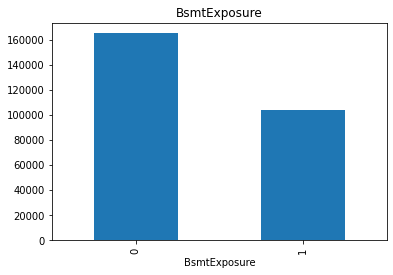

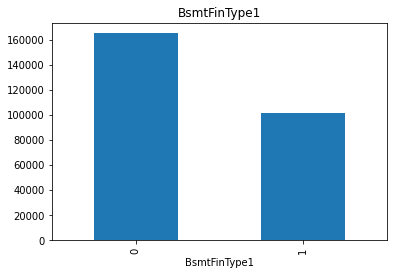

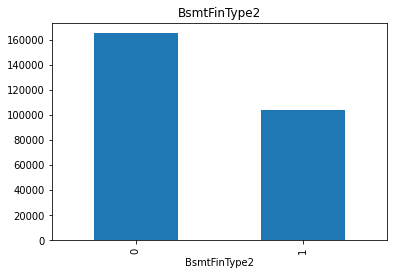

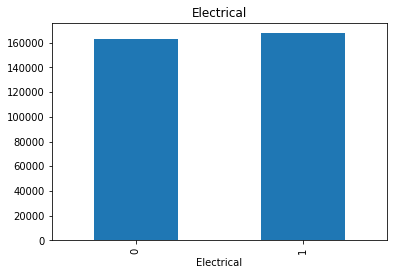

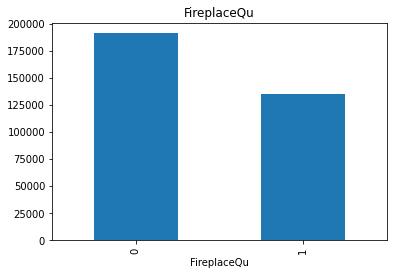

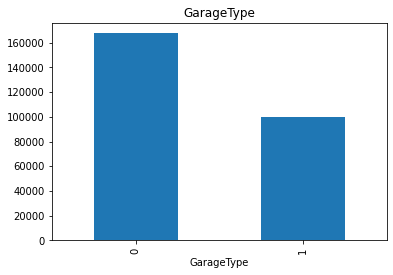

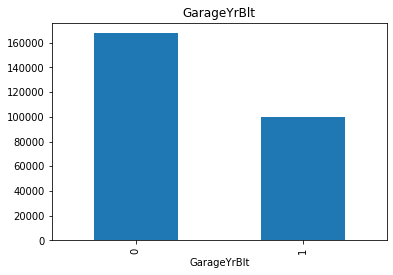

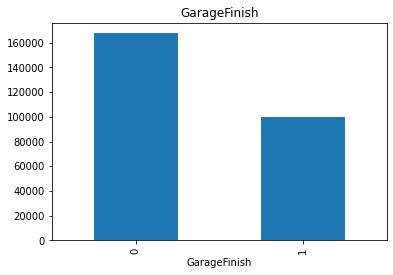

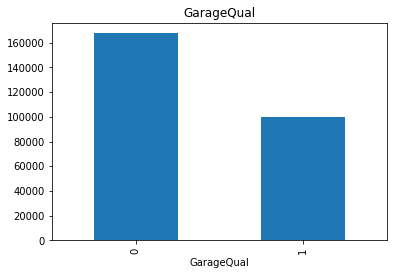

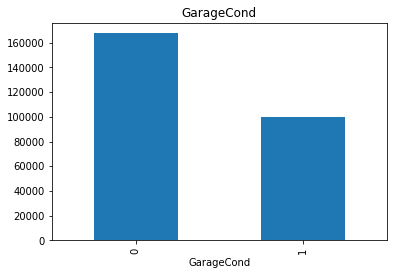

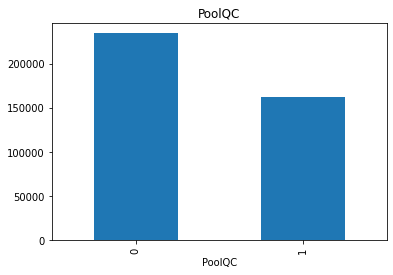

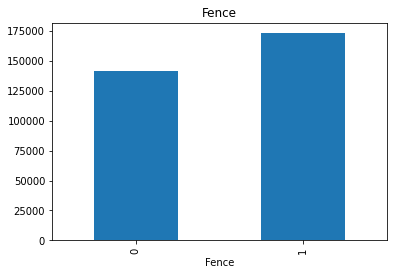

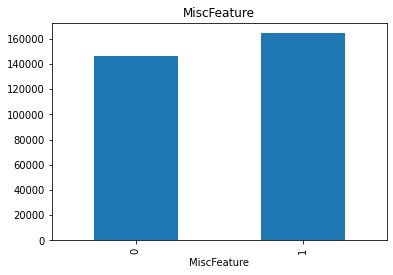

In [6]:
dataset = data.copy()

for feature in features_null:
    #Encoding as if feature value is null, assign value '1', if non-null, assign value '0'
    dataset[feature] = np.where(dataset[feature].isnull(),1,0)
    
    #Plot median sale price where information is present or absent
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

##### Here the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [7]:
data['BldgType'].dtype

dtype('O')

In [8]:
#List of Numerical features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
print('Number of Numerical features are ', len(numerical_features))
data[numerical_features].head()

Number of Numerical features are  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Datetime Variables)

From the Dataset, we have 4 year variables. We have to extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [9]:
#List of features that contain 'Year' information
year_feature = [feature for feature in numerical_features if 'Year' in feature or 'Yr' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs YearSold')

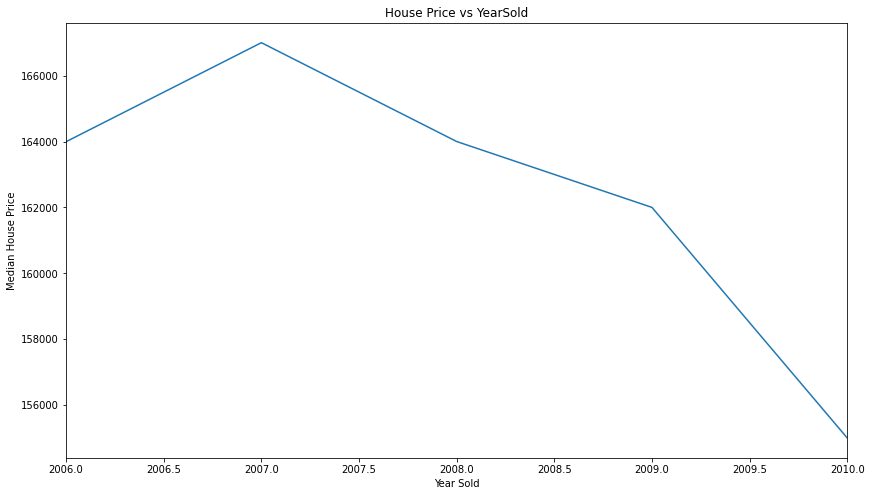

In [34]:
#Checking whether there is a relation between year the house is sold and the sales price
plt.figure(figsize=(14,8))
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

##### As property price increase with year, expected pattern was Sale price will increase. On the contrary, here the SalePrice decreases. This shows that there are other Year variables in relation to Year Sold that is affecting the Sale price of House.

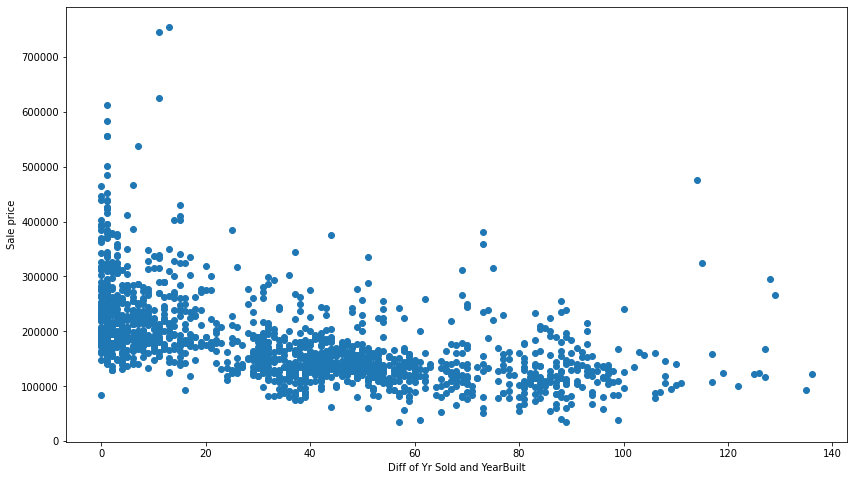

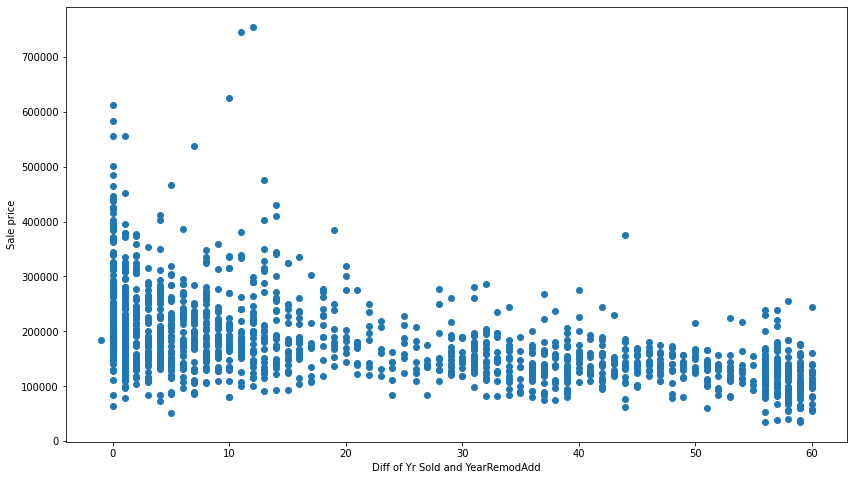

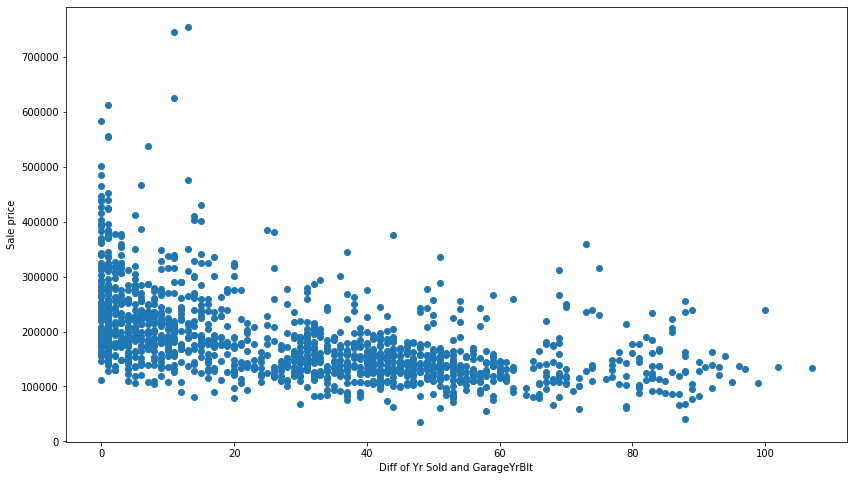

In [10]:
#Compare difference of all 3 years from YrSold with SalePrice
dataset = data.copy()

for feature in year_feature:
    if feature != 'YrSold':
        plt.figure(figsize=(14,8))
        dataset[feature] = dataset['YrSold'] -dataset[feature]
        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel('Diff of Yr Sold and '+ feature )
        plt.ylabel('Sale price')
        plt.show()

##### This shows as the gap b/w Yr sold and Yr of House build or Yr of Remodelling house increases, the Sale price of House decreases which is as the expected pattern.

In [11]:
#Numerical Features can further be sub-divided into - Discrete & Continuous
#Taking out Discrete Numerical features which have unique values atleast less than 25 and not one of 4 year features and ID
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature + ['Id']]
print('Number of Discrete Numerical features are ', len(discrete_features))
data[discrete_features].head()

Number of Discrete Numerical features are  17


,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


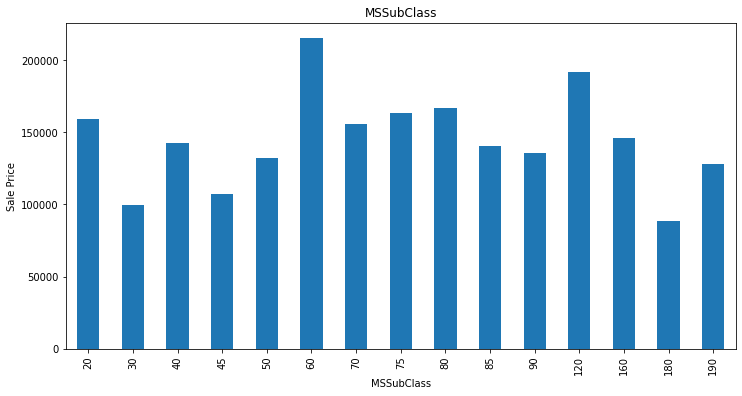

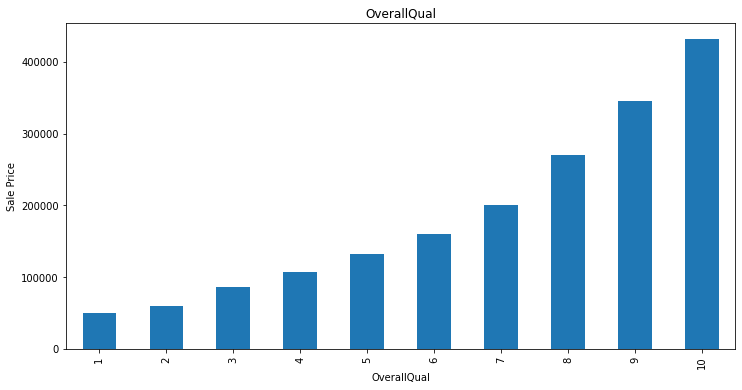

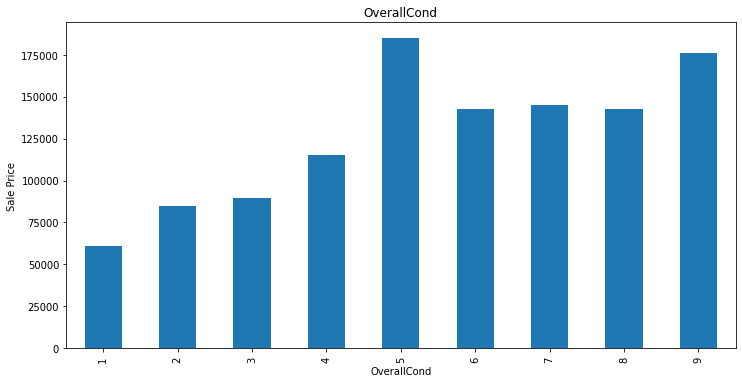

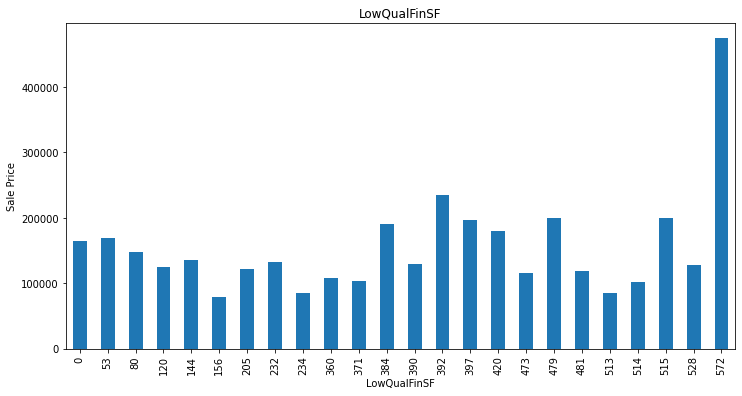

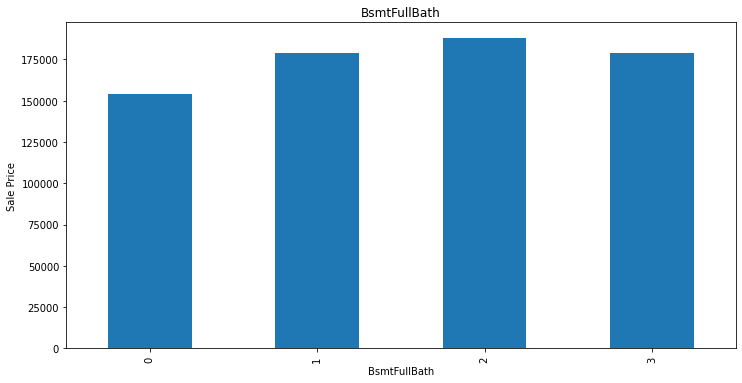

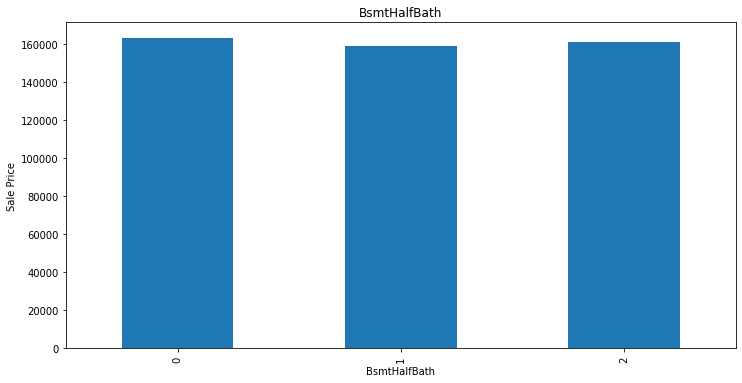

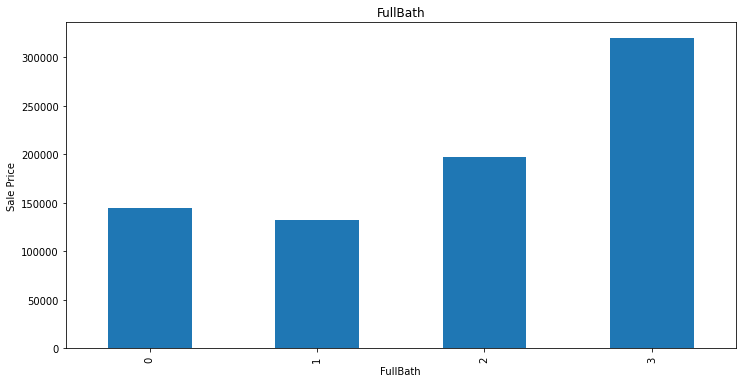

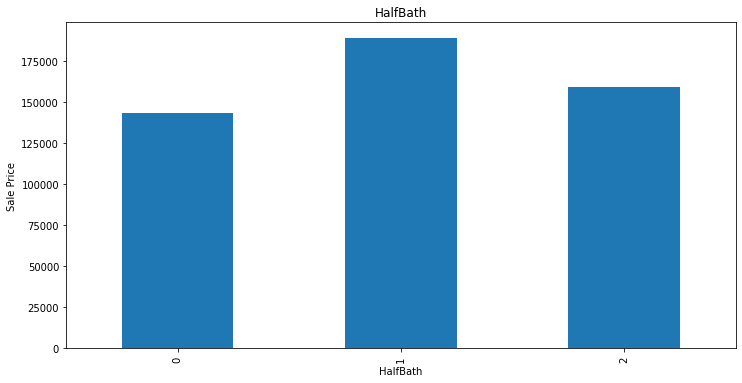

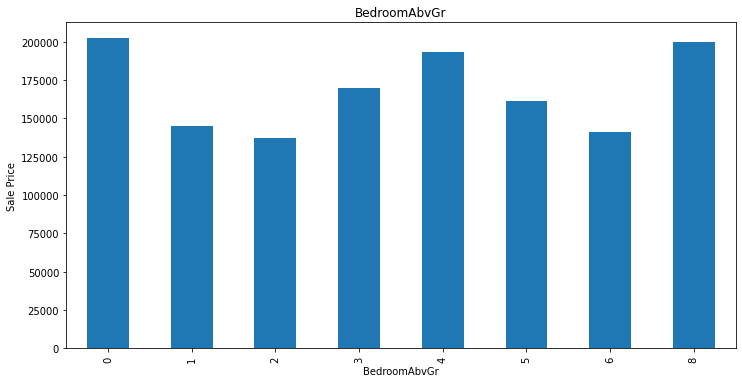

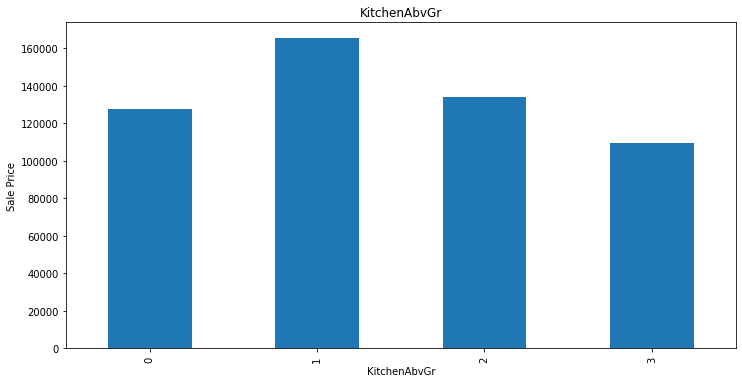

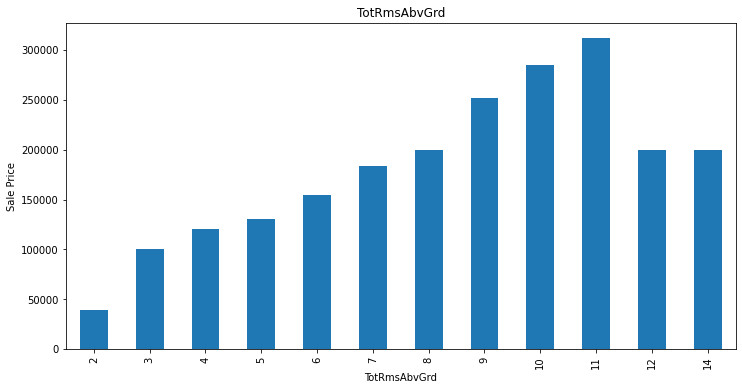

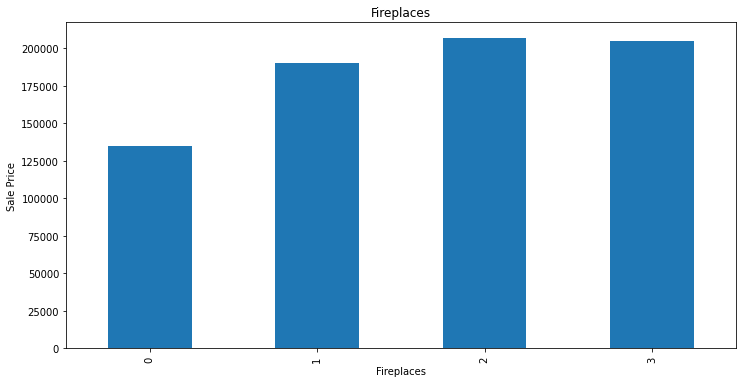

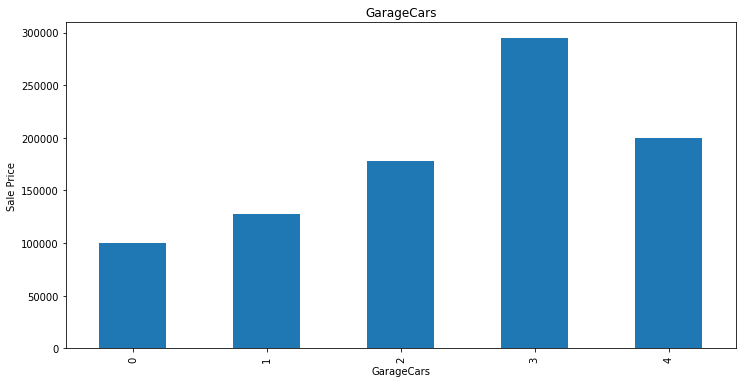

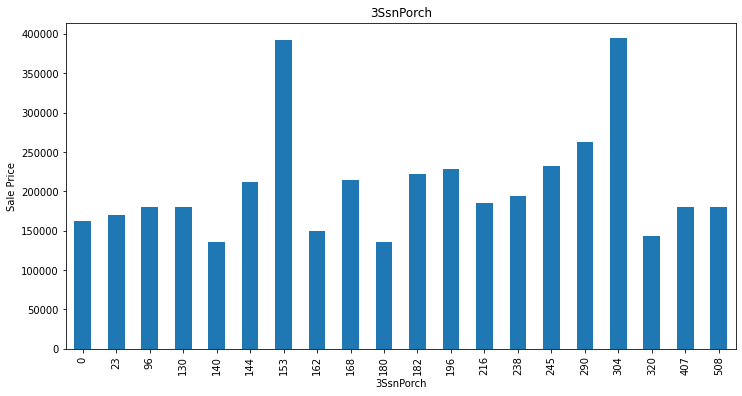

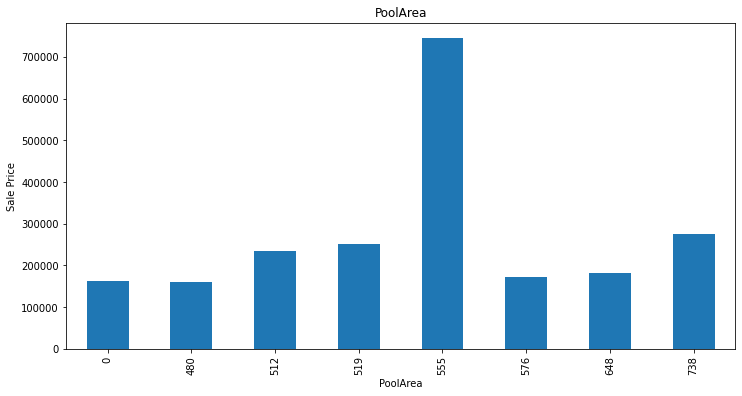

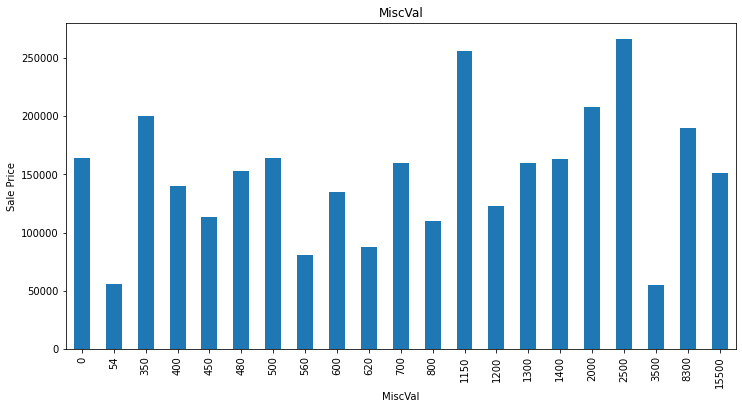

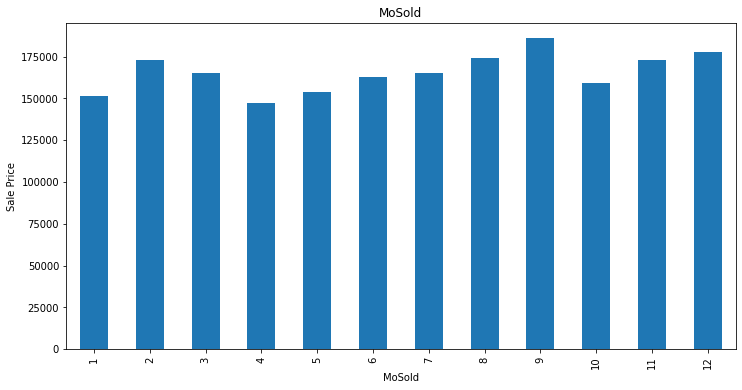

In [12]:
#Analyze Relation b/w Discrete fetaures and Sale Price
dataset = data.copy()

for feature in discrete_features:  
    plt.figure(figsize=(12,6))
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.show()

##### Clearly we can see relation b/w all discrete variables and sale price whci can be seen from each bar plot

In [13]:
#Taking out Continuous Numerical features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + year_feature + ['Id']]
print('Number of Continuous Numerical features are ', len(continuous_features))
data[continuous_features].head()

Number of Continuous Numerical features are  16


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000


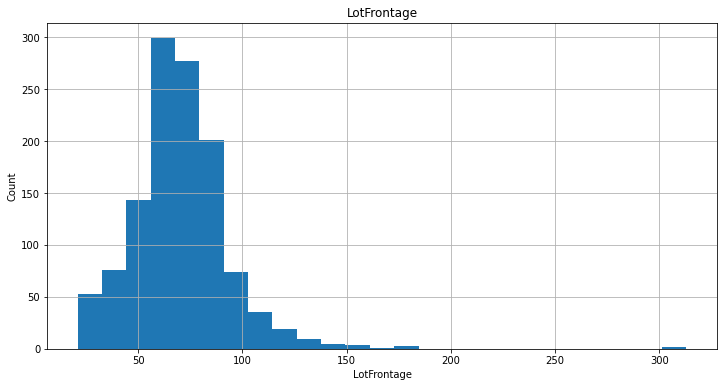

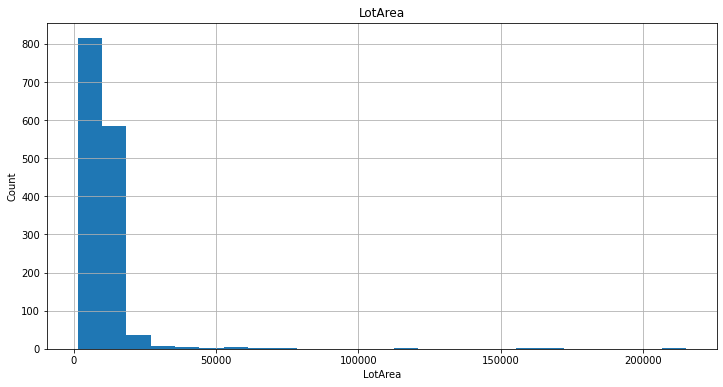

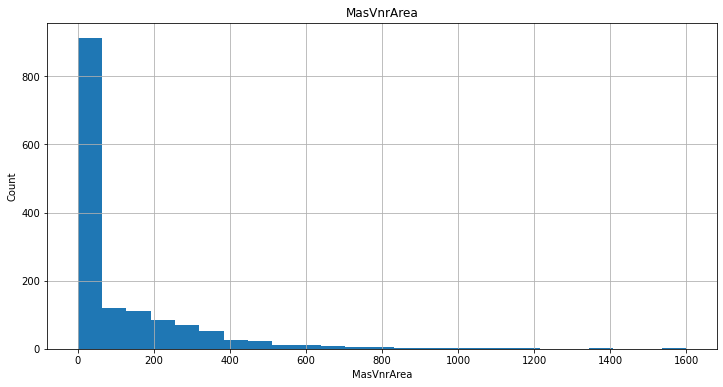

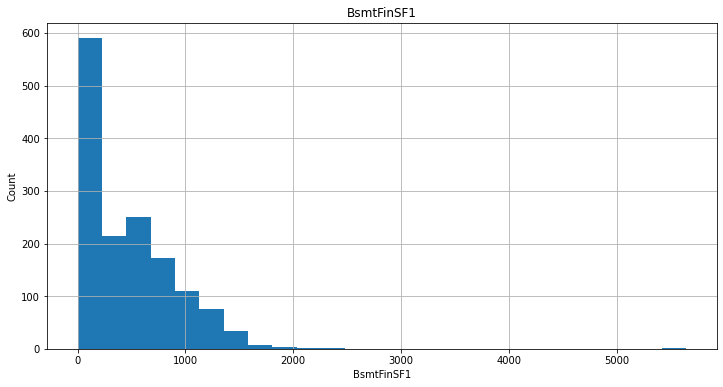

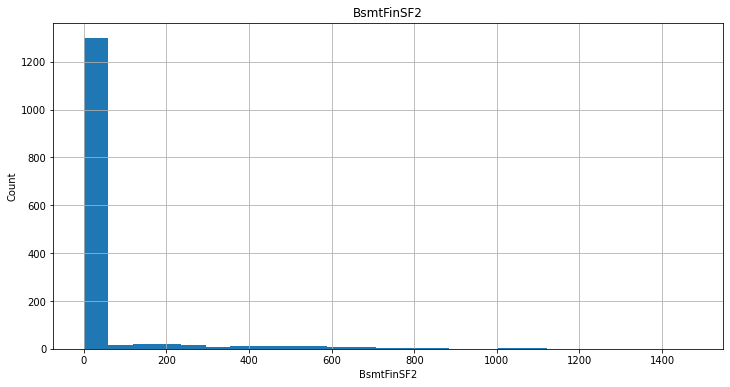

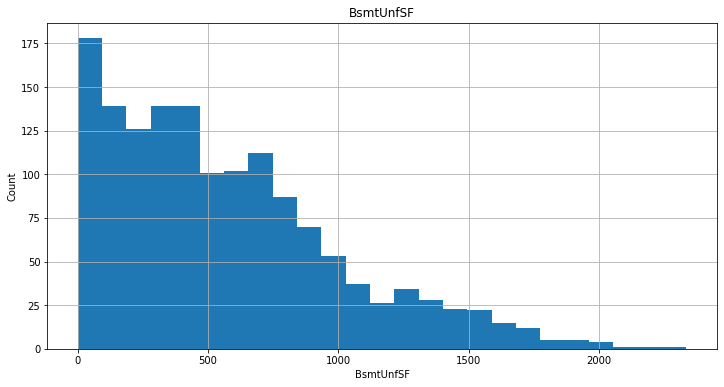

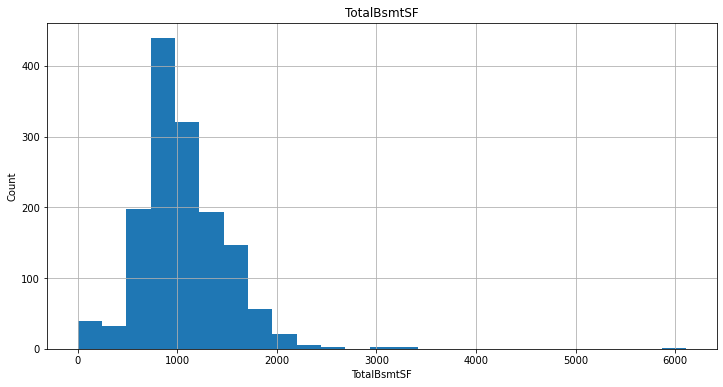

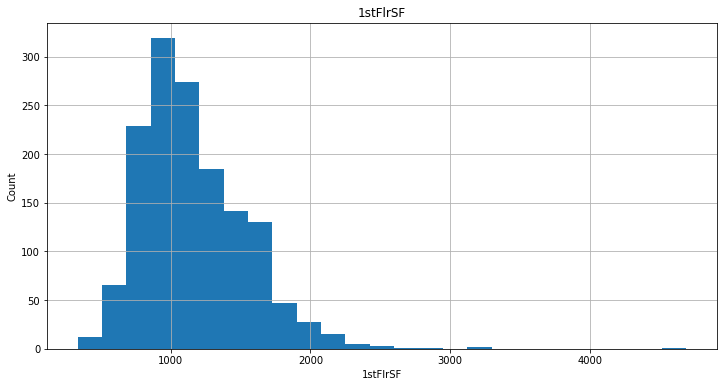

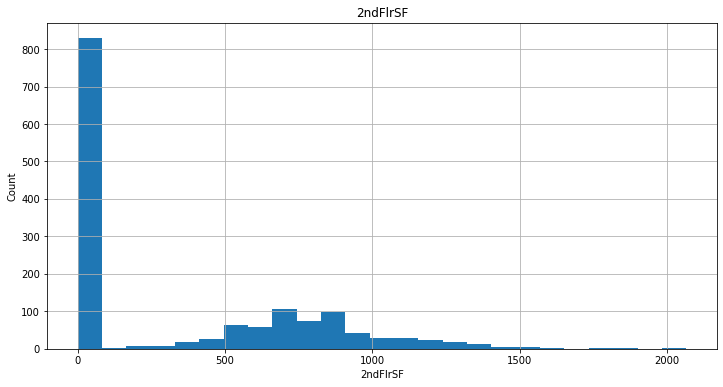

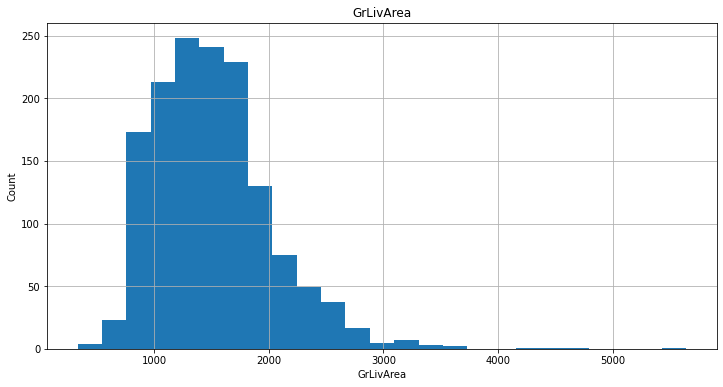

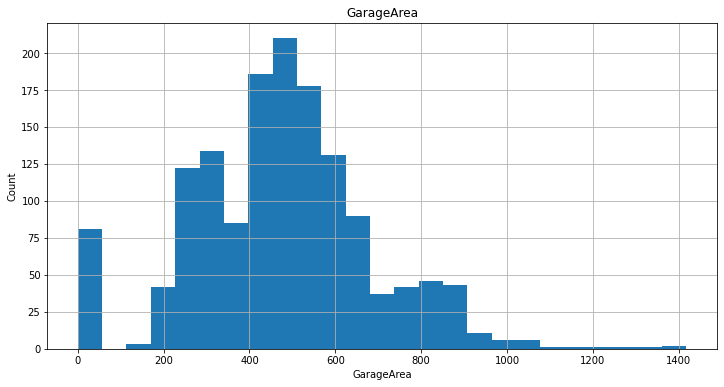

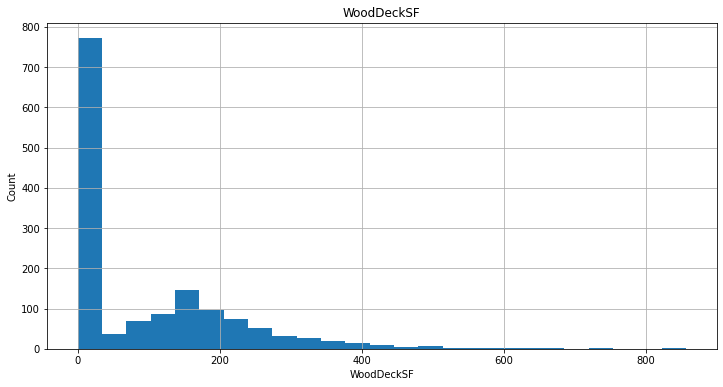

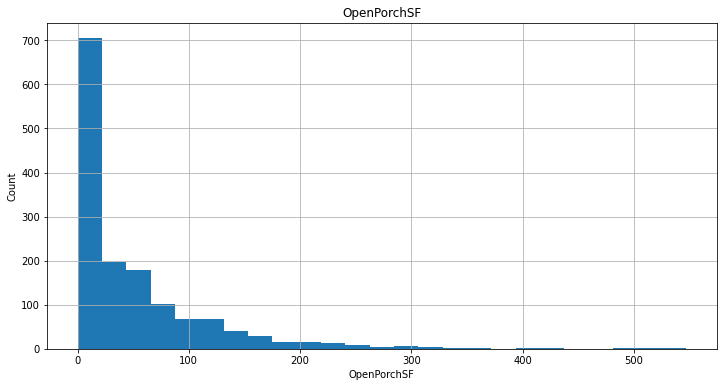

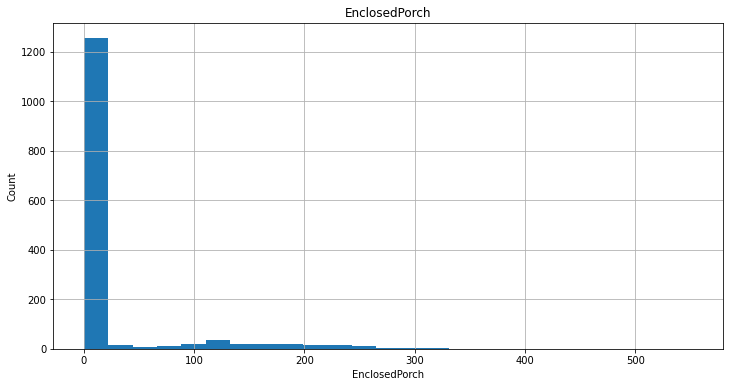

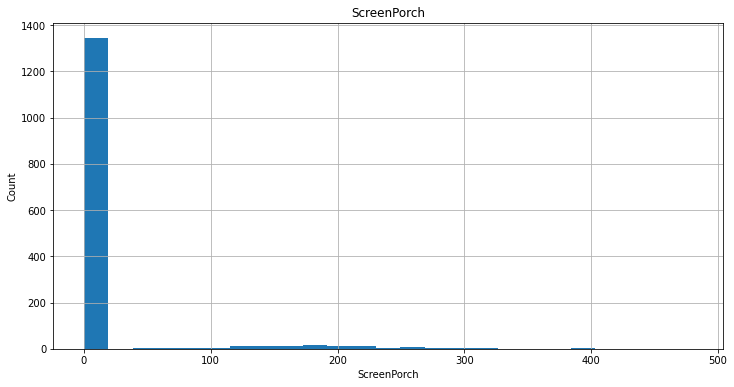

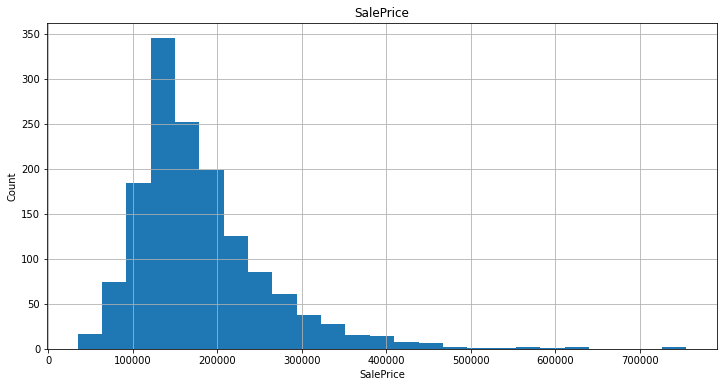

In [14]:
#Analyze Distribution of Continuous fetaures
dataset = data.copy()
    
for feature in continuous_features:
    plt.figure(figsize=(12,6))
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

##### From here we can observe that most of the graphs are not normally distributed and data appears skewed for many features. 

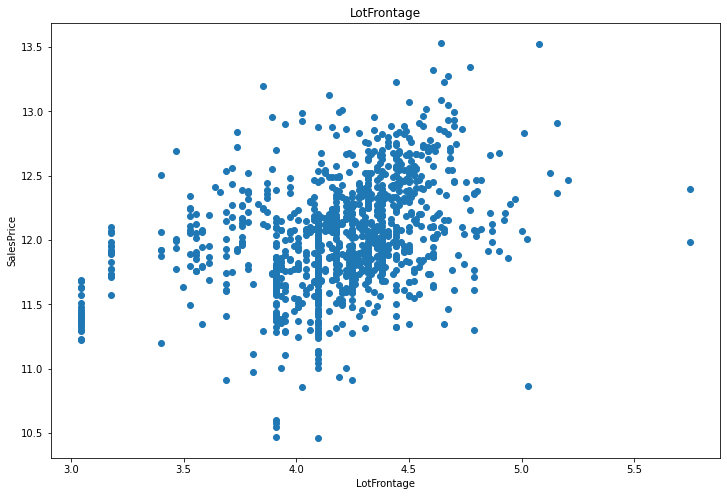

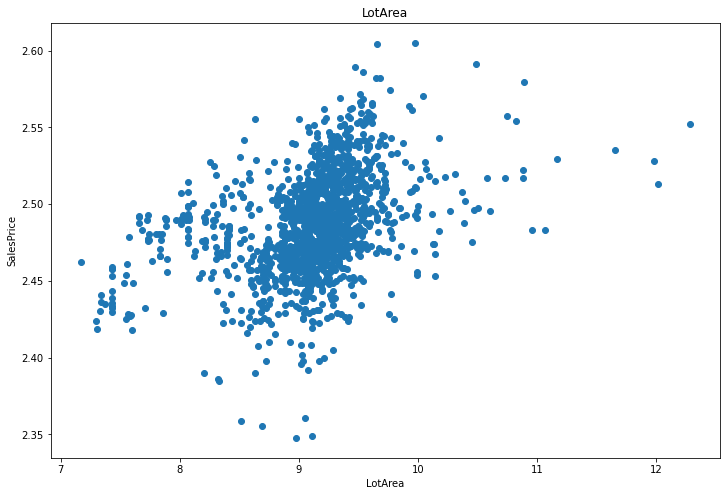

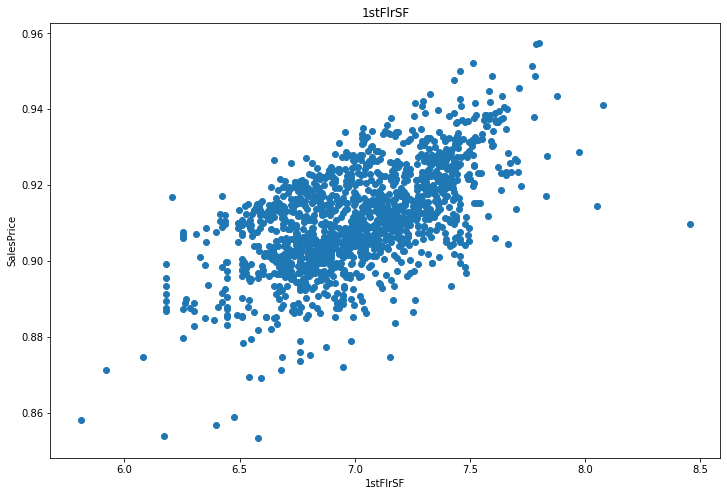

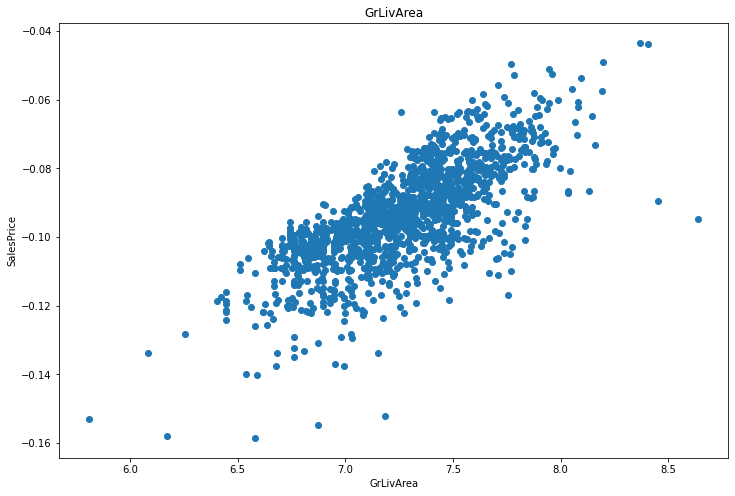

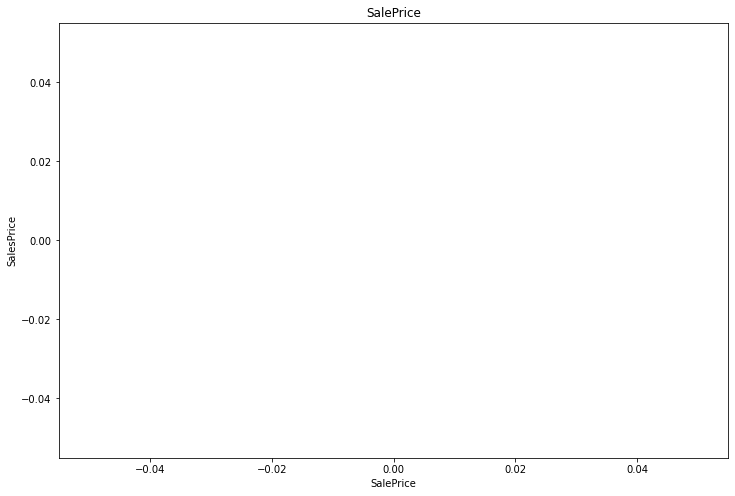

In [17]:
#Logarithmic Transformation to visualize each feature
dataset = data.copy()

for feature in continuous_features:
    #Ignoring value 0 of each feature as log(0) is not defined
    if 0 in dataset[feature].unique():
        pass
    else:
        plt.figure(figsize=(12,8))
        dataset[feature] = np.log(dataset[feature])
        dataset['SalePrice'] = np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

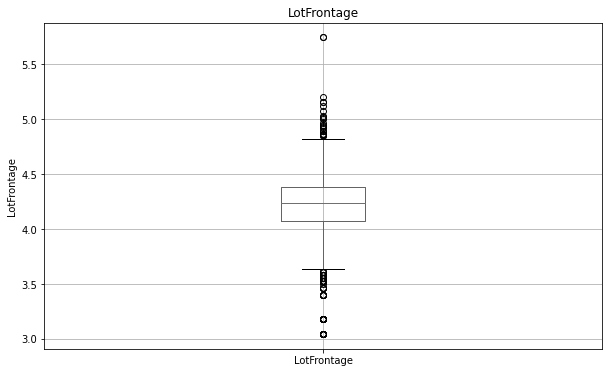

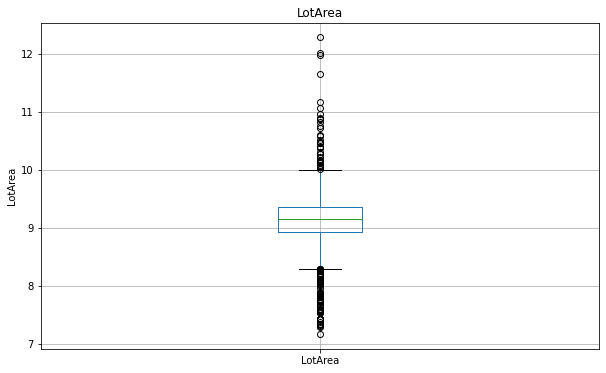

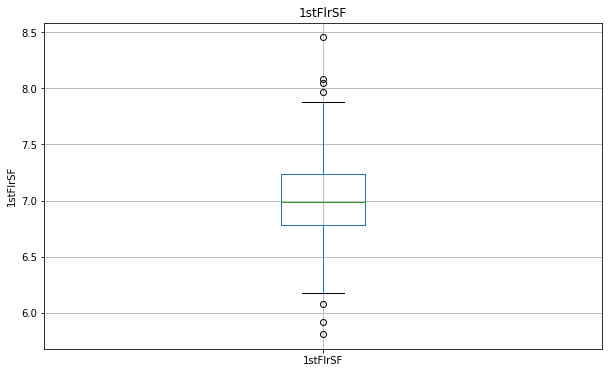

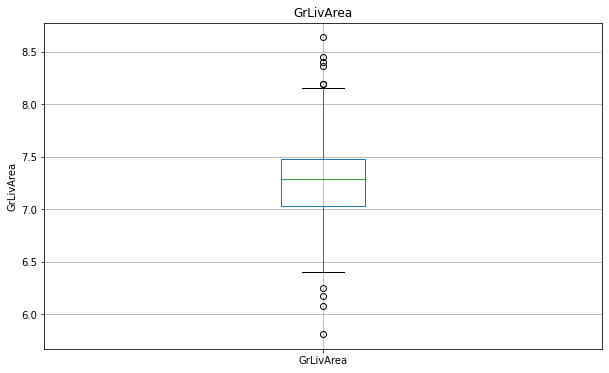

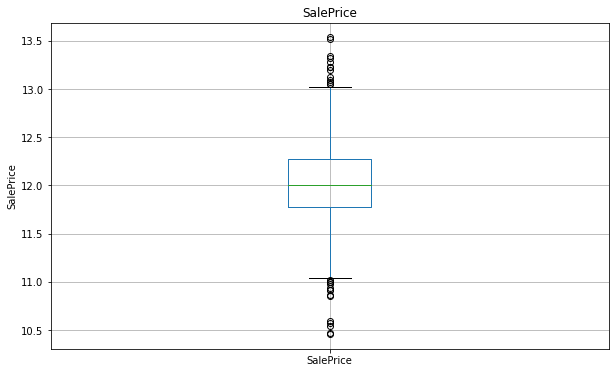

In [23]:
#Checking Outliers
for feature in continuous_features:
    dataset = data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        plt.figure(figsize=(10,6))
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##### From here we can observe that there are may outliers existing for all continuous features and we will handle them during Feature Engineering process

### Categorical Features

In [26]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [29]:
for feature in categorical_features:
    print('Feature is {} and number of categories are {}'.format(feature, len(data[feature].unique())))

Feature is MSZoning and number of categories are 5
Feature is Street and number of categories are 2
Feature is Alley and number of categories are 3
Feature is LotShape and number of categories are 4
Feature is LandContour and number of categories are 4
Feature is Utilities and number of categories are 2
Feature is LotConfig and number of categories are 5
Feature is LandSlope and number of categories are 3
Feature is Neighborhood and number of categories are 25
Feature is Condition1 and number of categories are 9
Feature is Condition2 and number of categories are 8
Feature is BldgType and number of categories are 5
Feature is HouseStyle and number of categories are 8
Feature is RoofStyle and number of categories are 6
Feature is RoofMatl and number of categories are 8
Feature is Exterior1st and number of categories are 15
Feature is Exterior2nd and number of categories are 16
Feature is MasVnrType and number of categories are 5
Feature is ExterQual and number of categories are 4
Feature

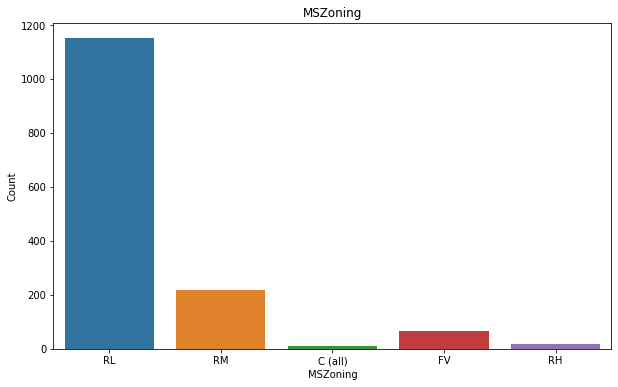

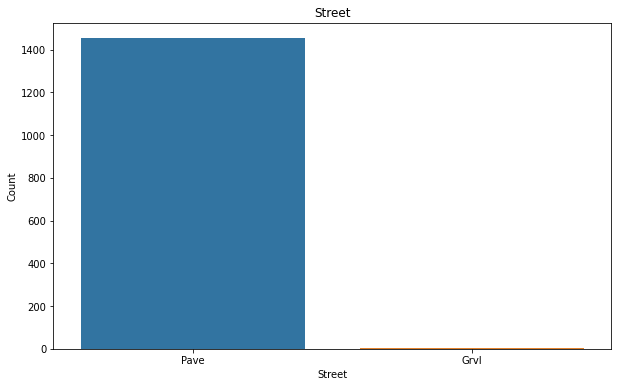

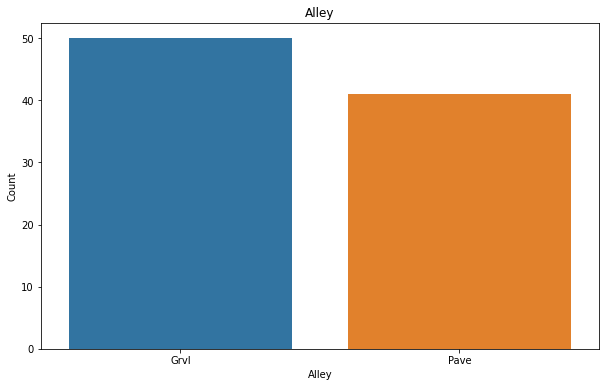

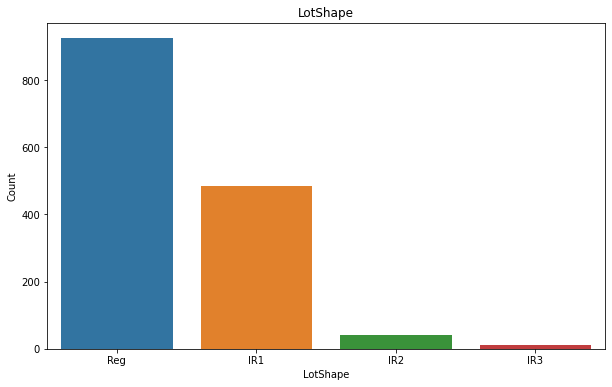

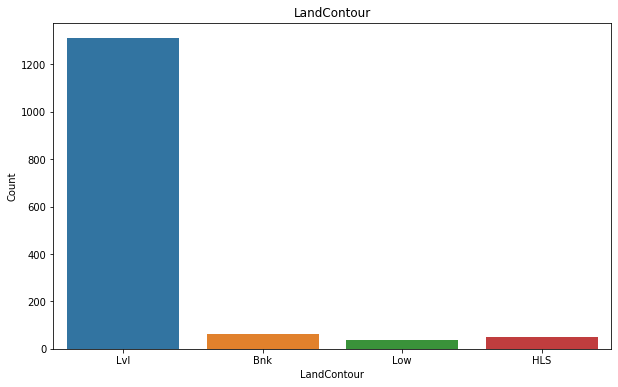

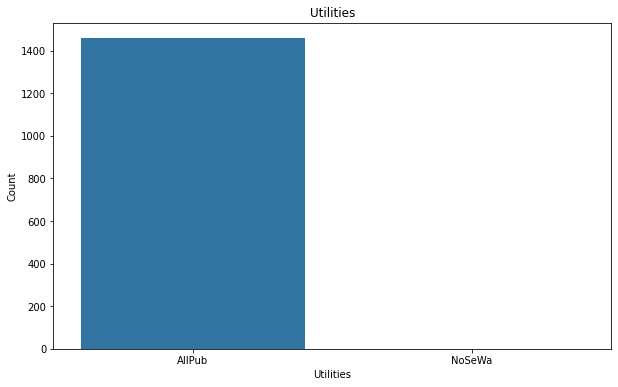

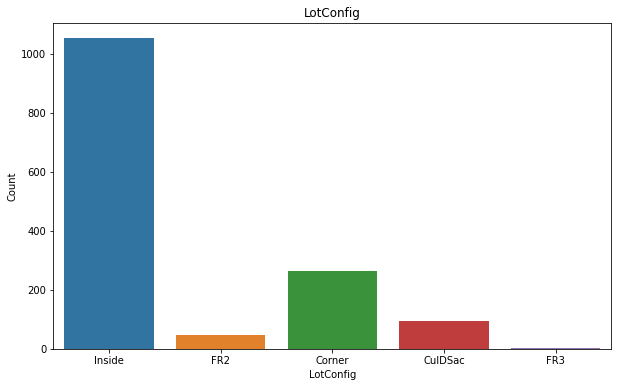

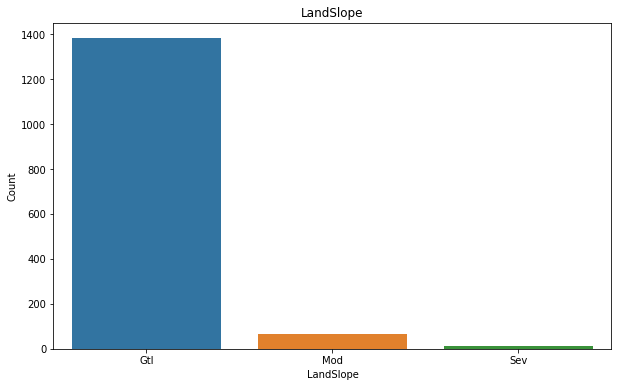

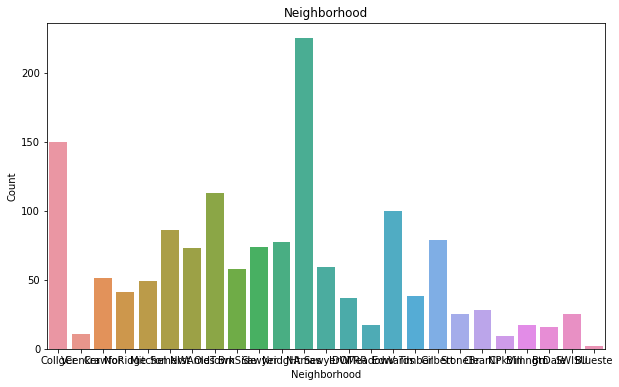

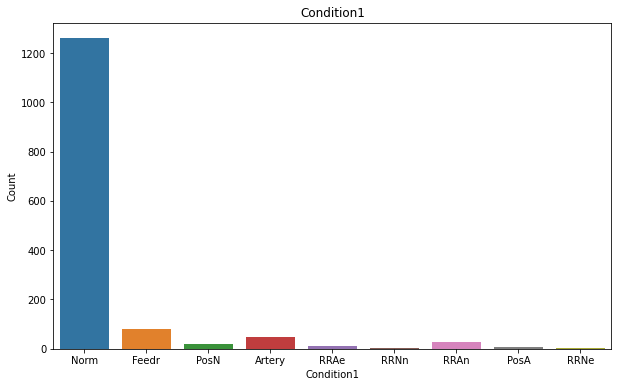

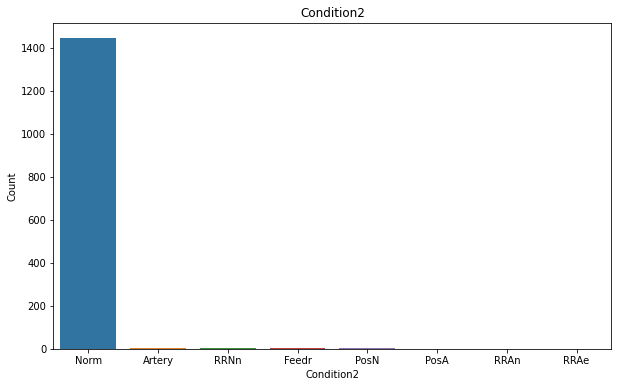

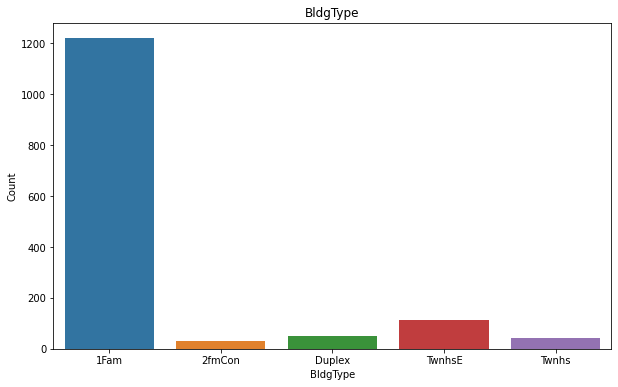

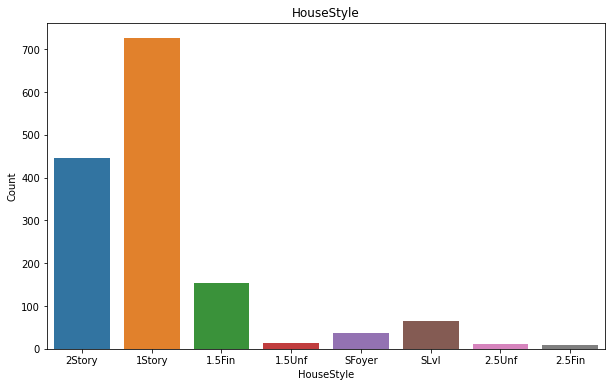

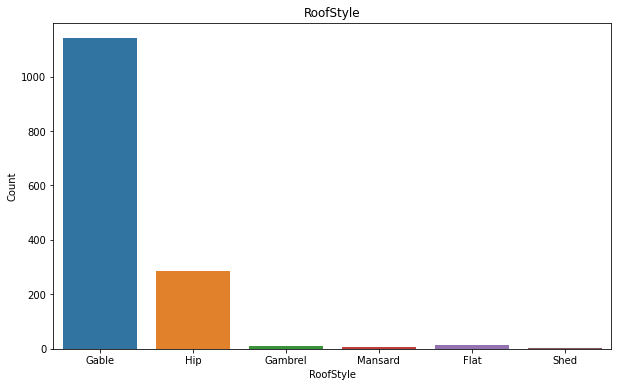

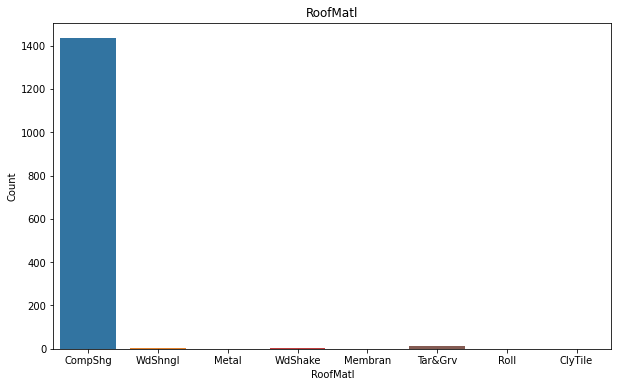

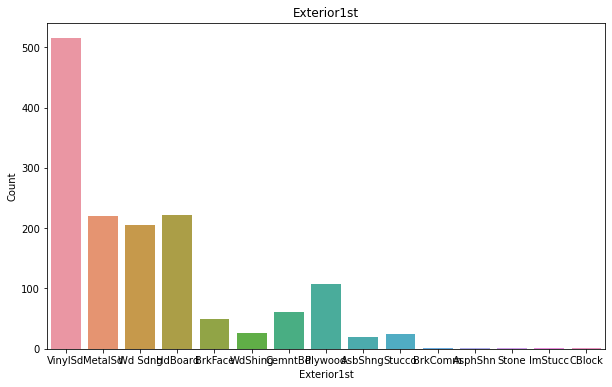

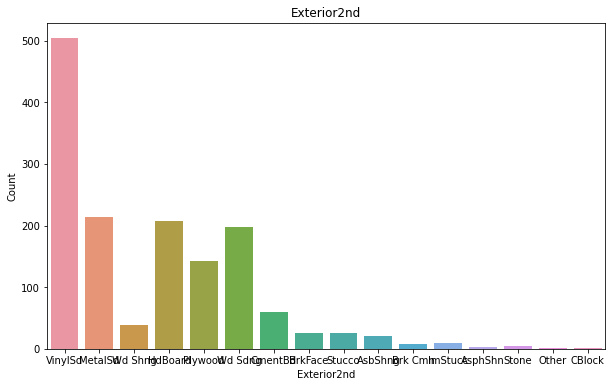

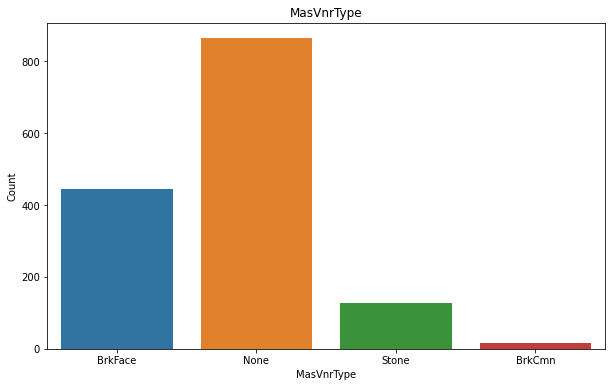

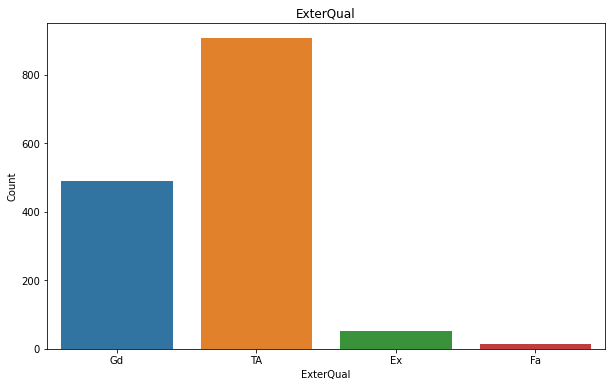

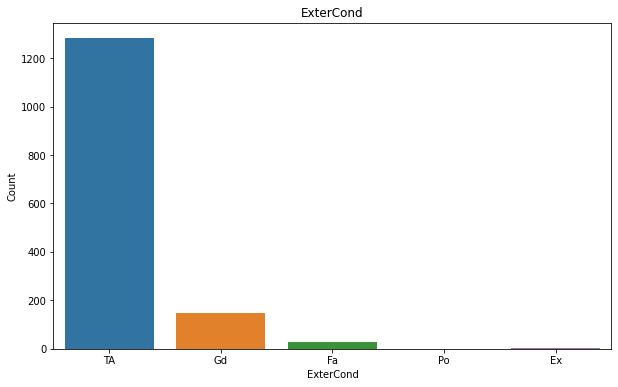

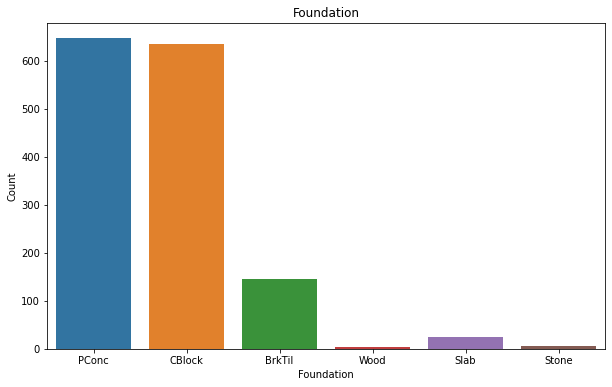

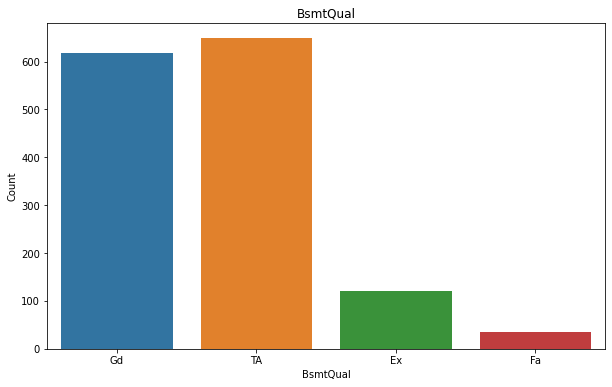

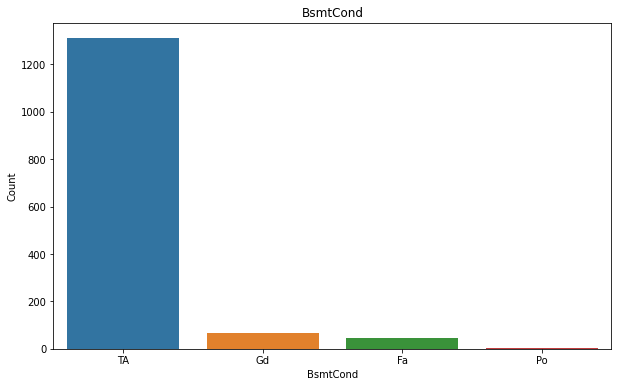

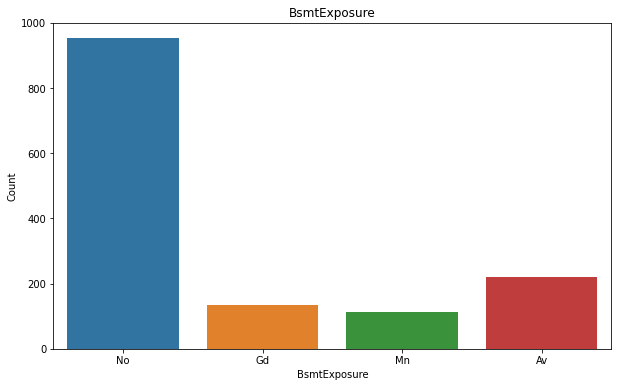

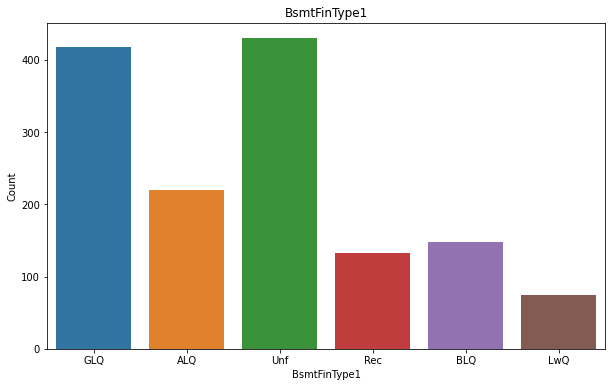

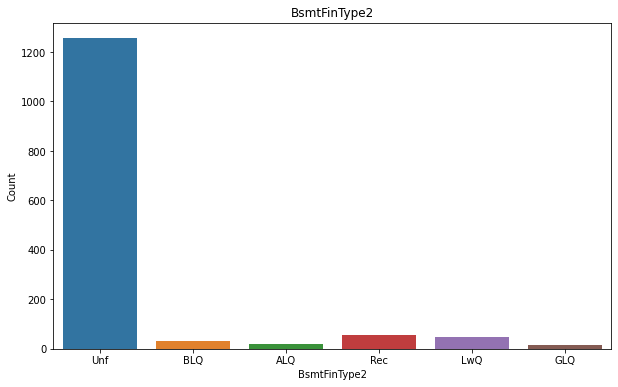

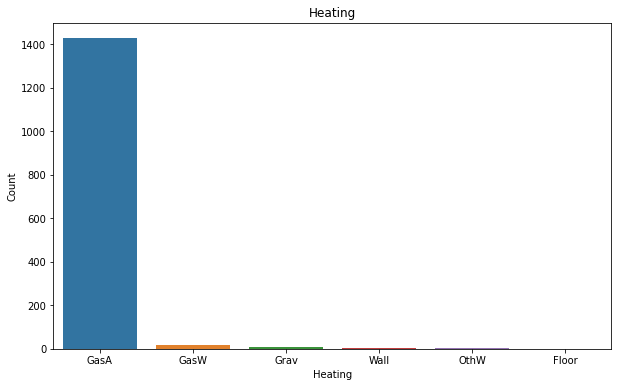

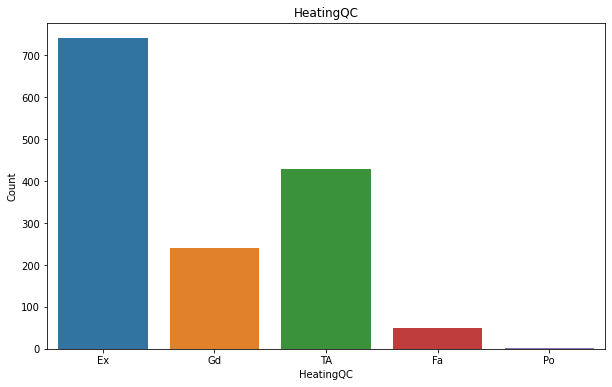

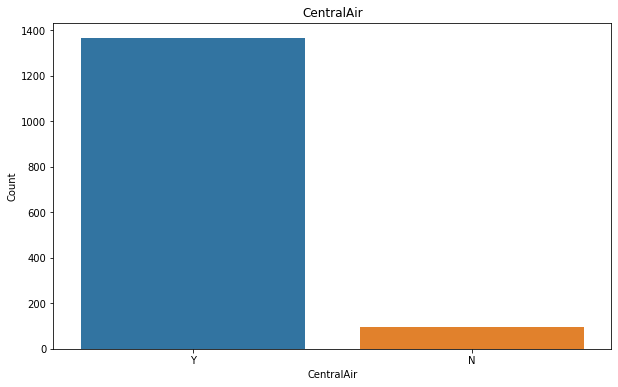

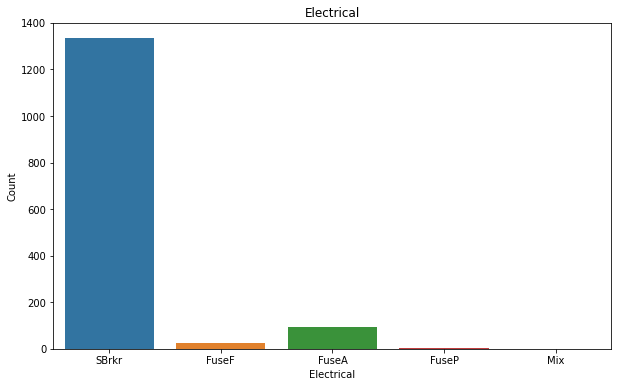

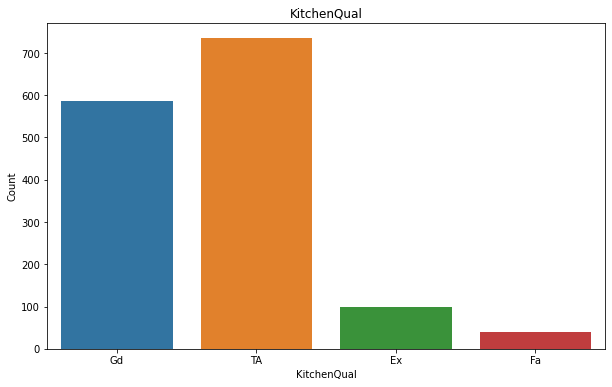

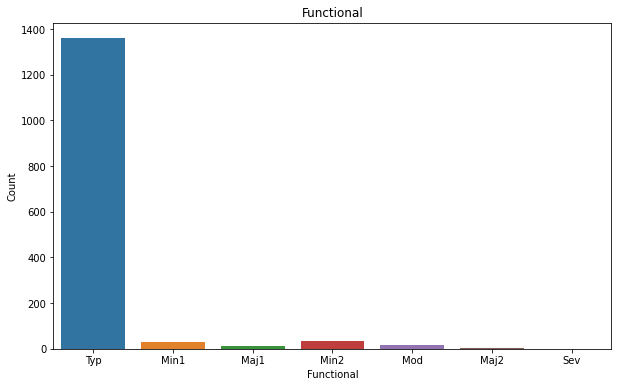

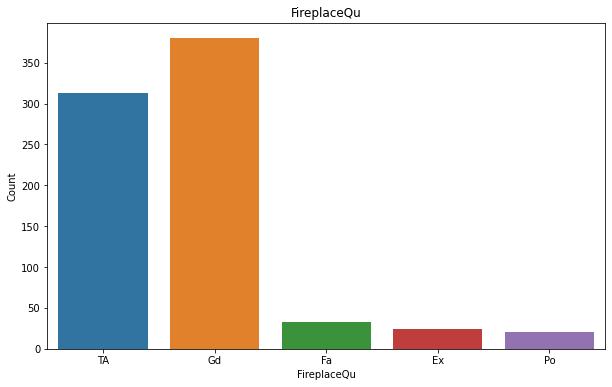

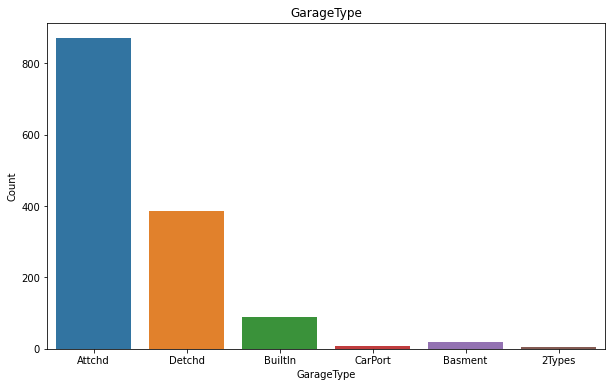

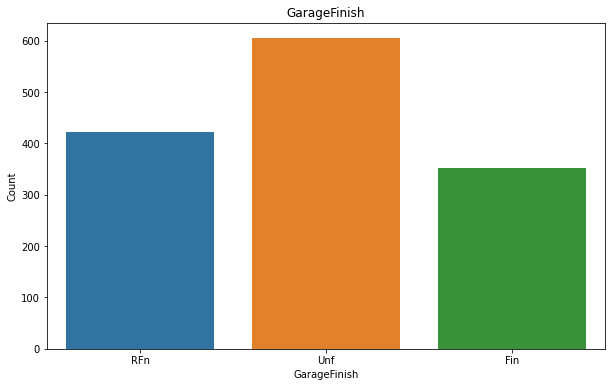

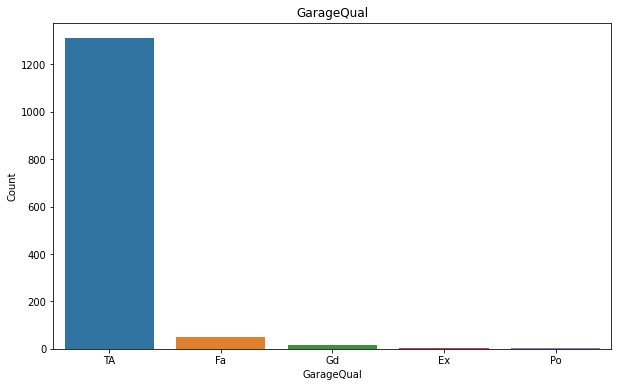

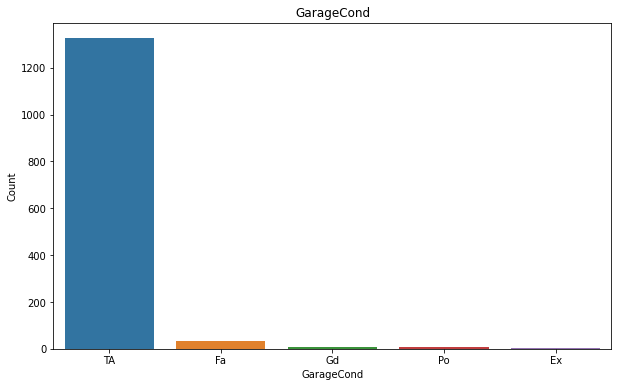

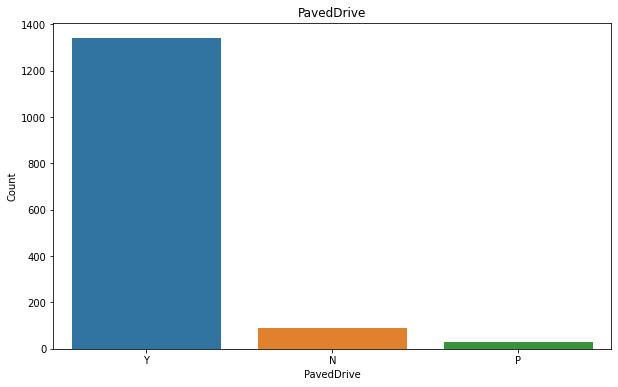

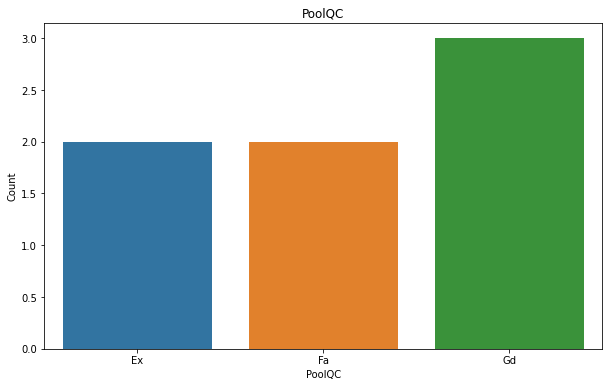

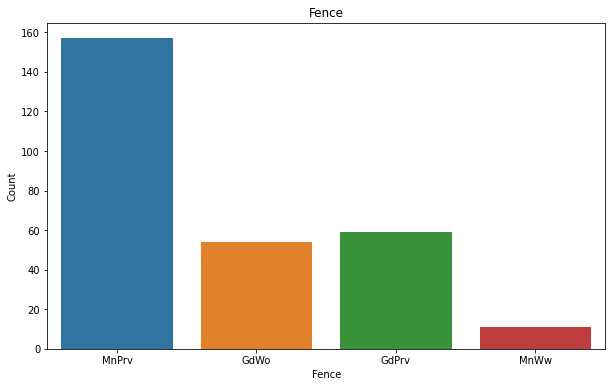

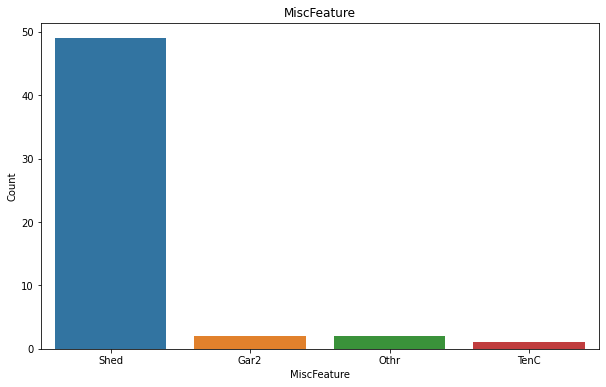

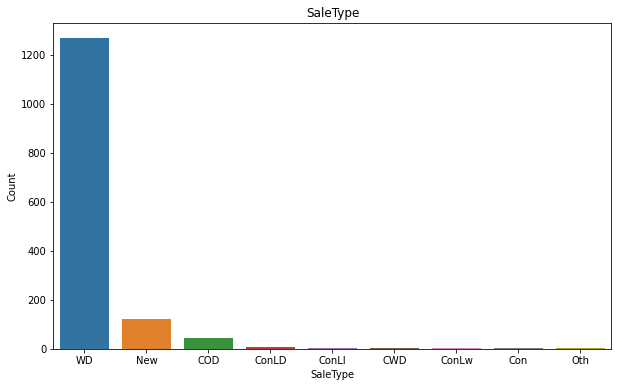

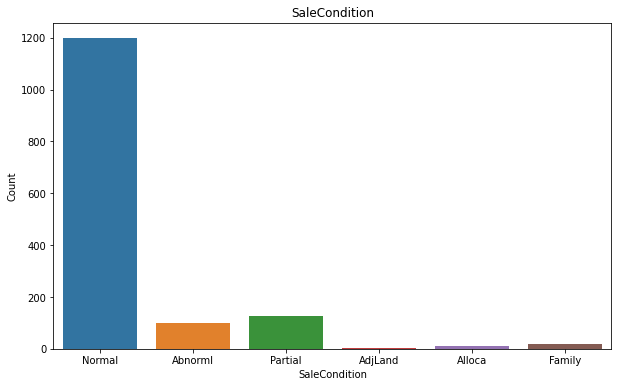

In [31]:
#Plot to observe count frequency of each categorical variabe in data 
dataset = data.copy()

for feature in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(x=feature, data=dataset)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

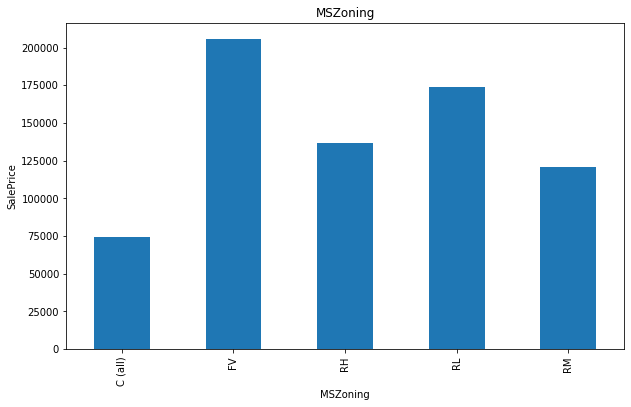

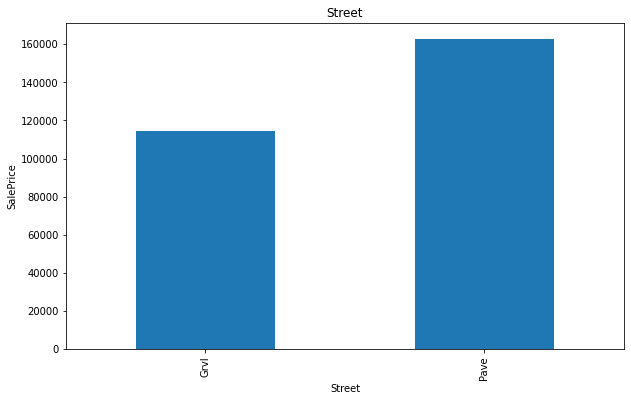

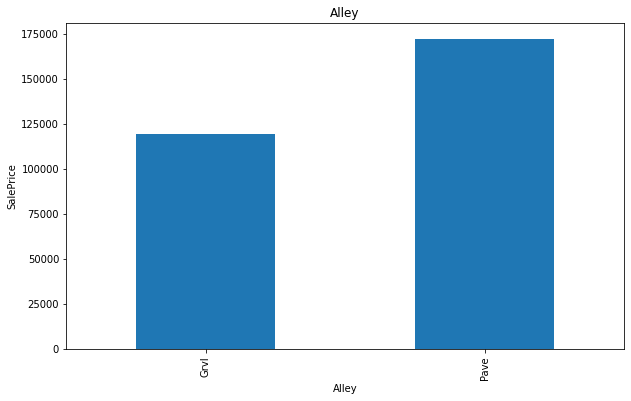

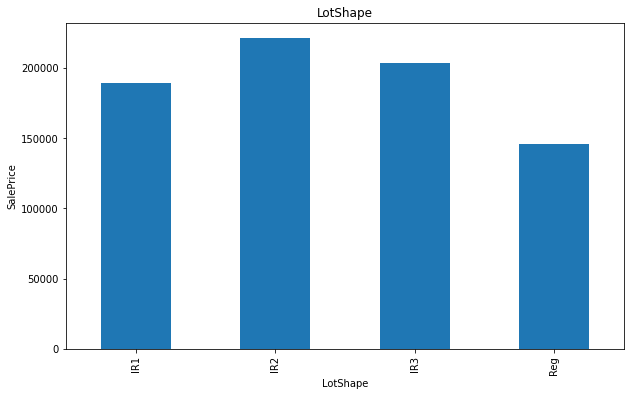

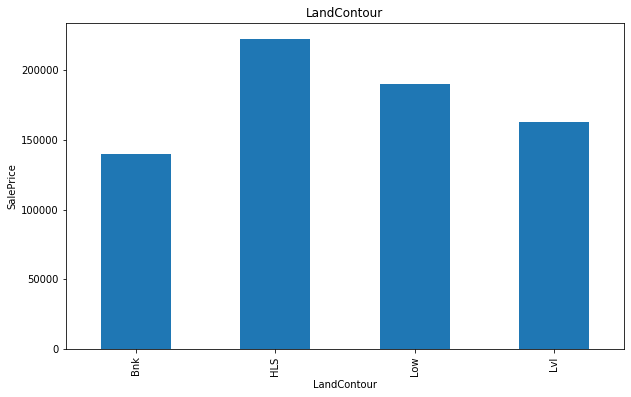

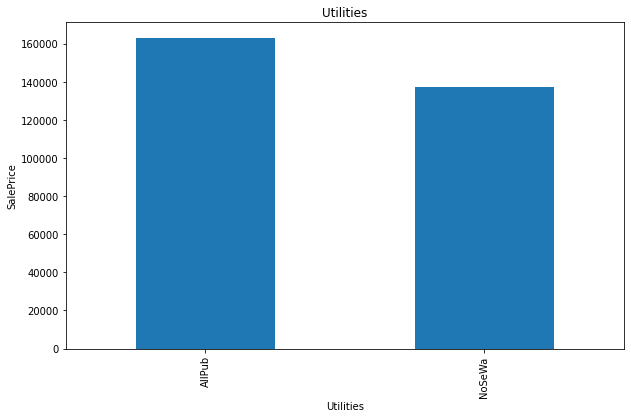

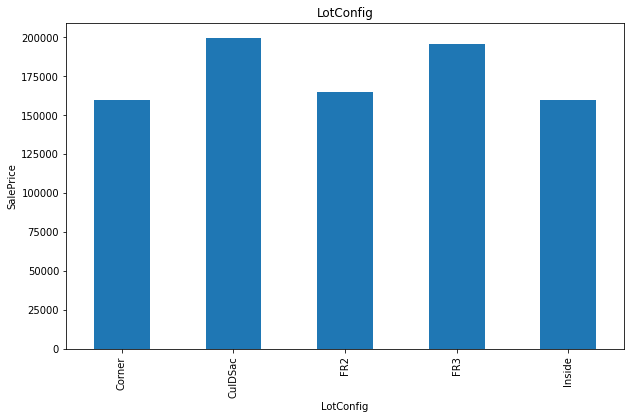

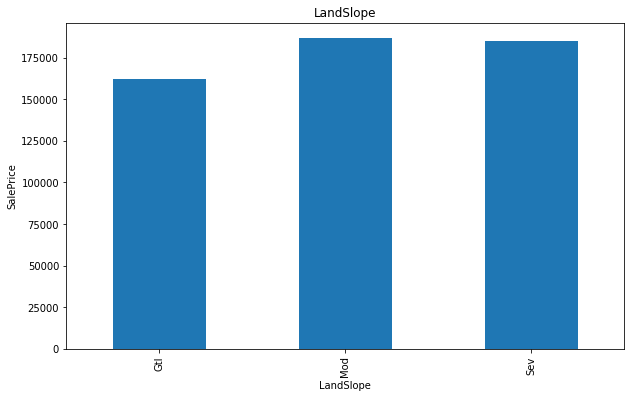

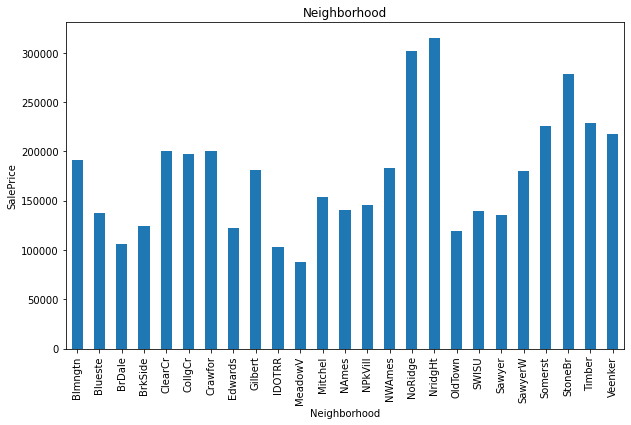

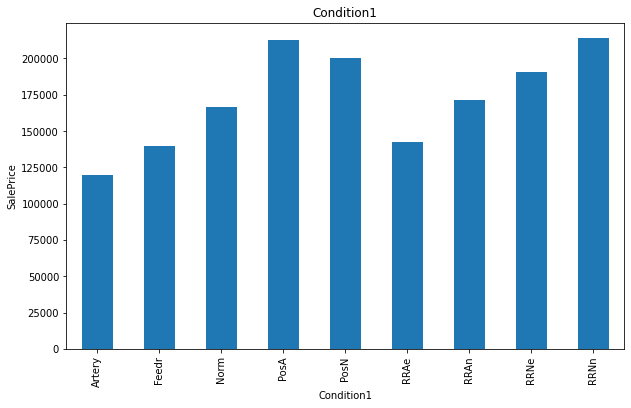

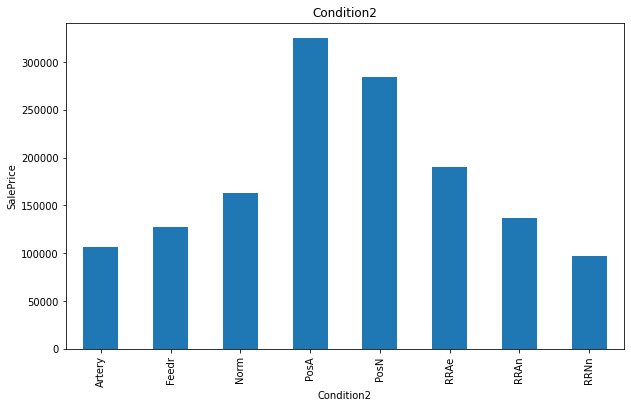

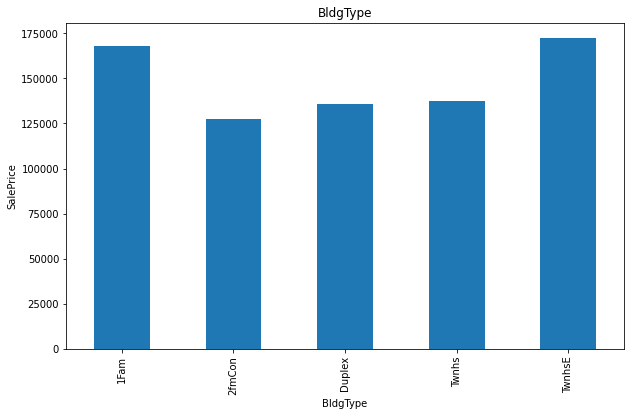

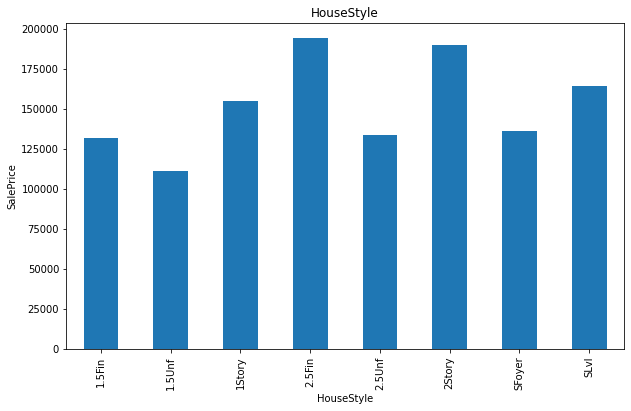

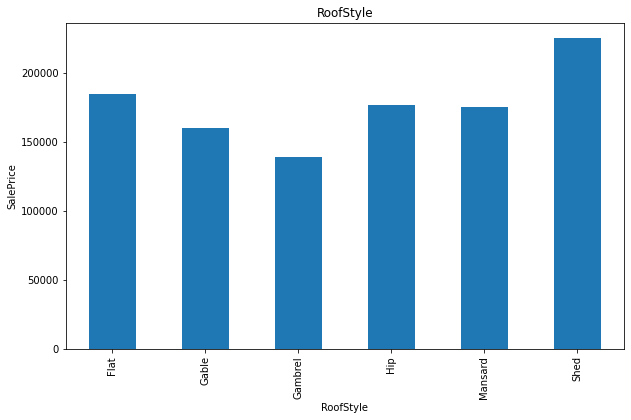

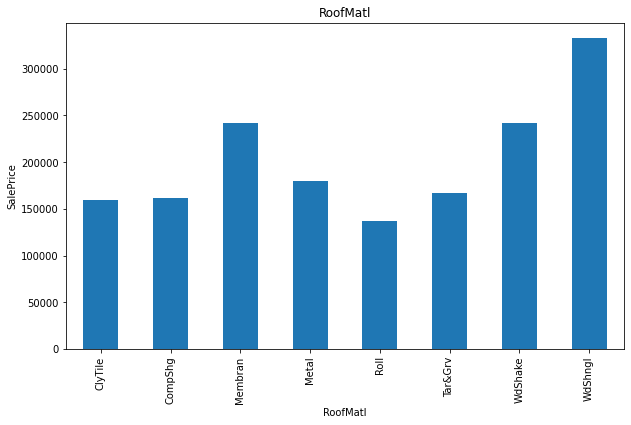

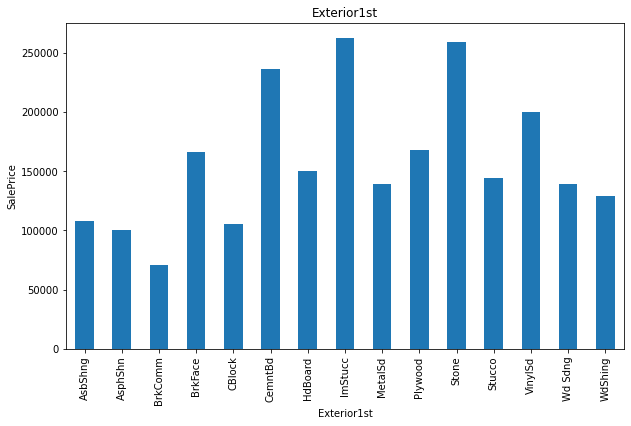

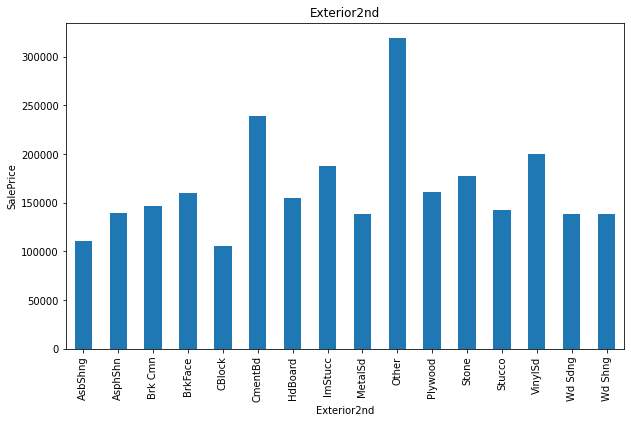

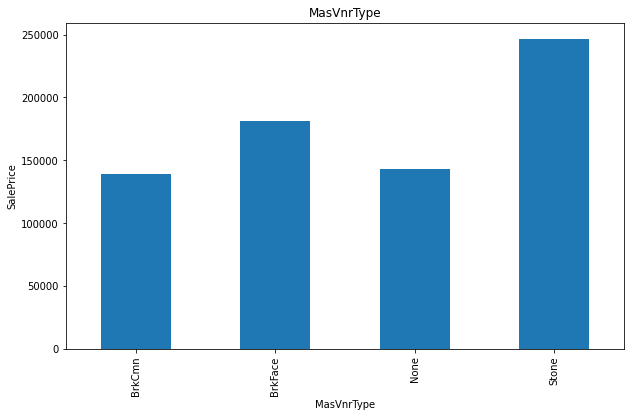

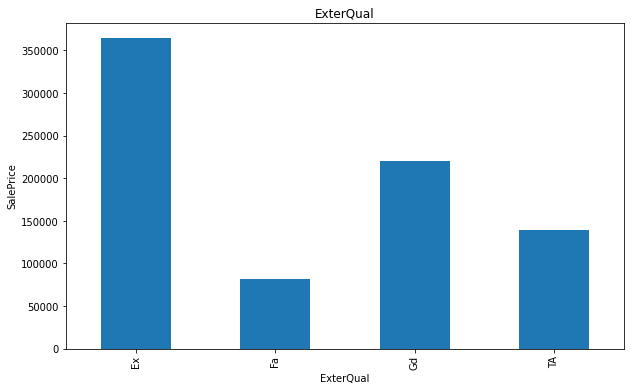

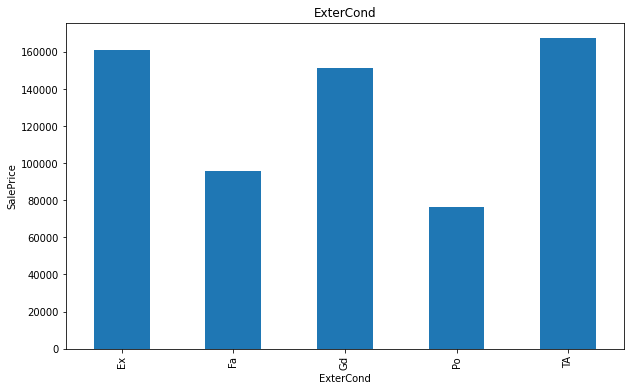

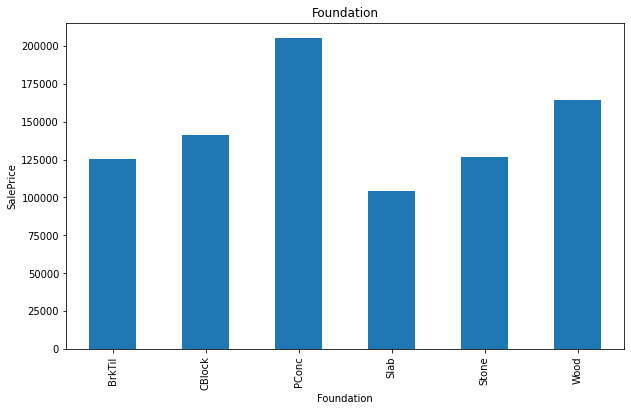

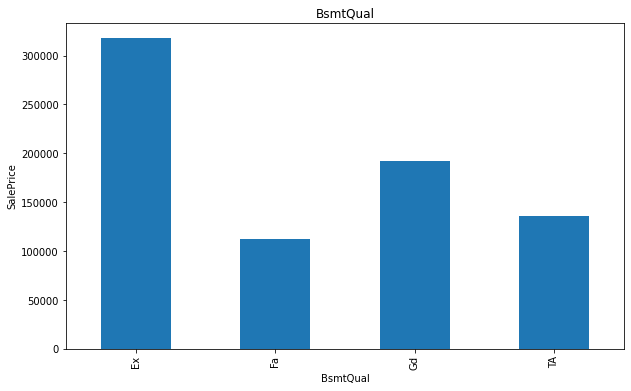

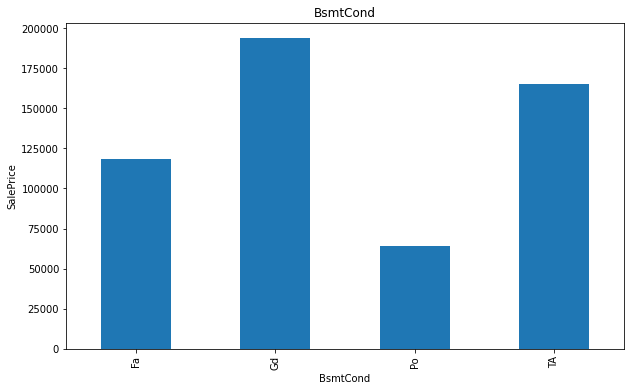

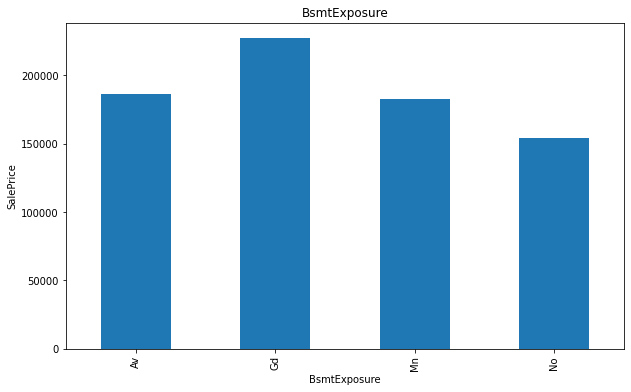

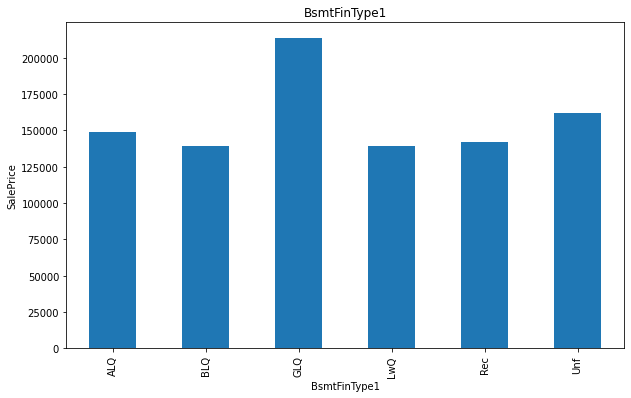

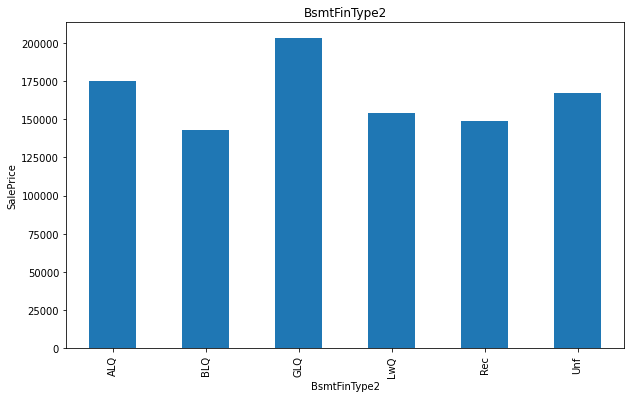

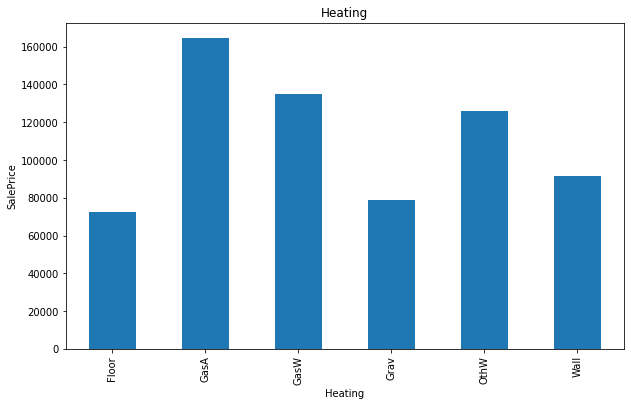

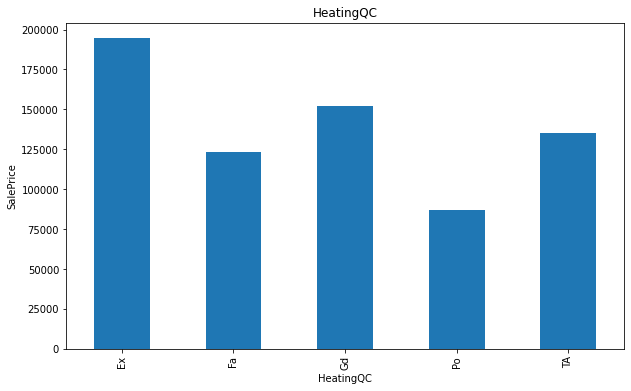

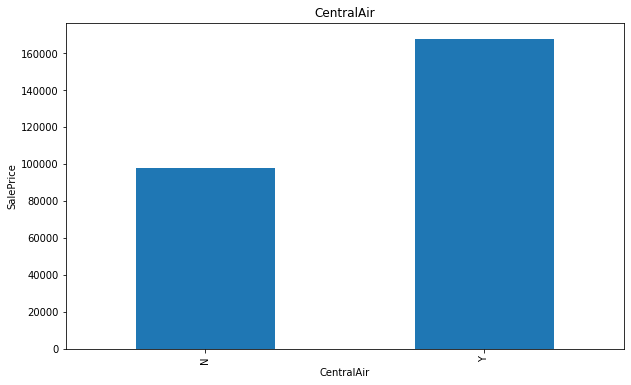

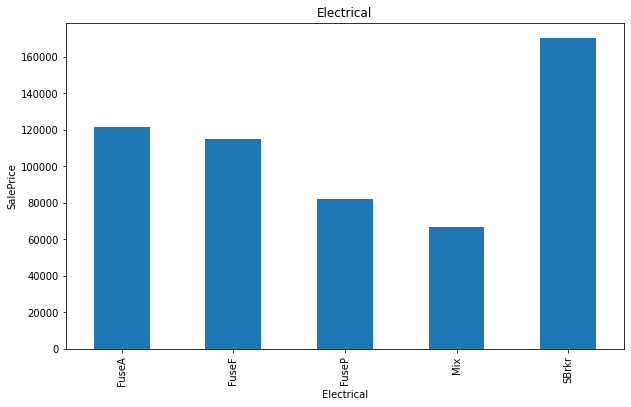

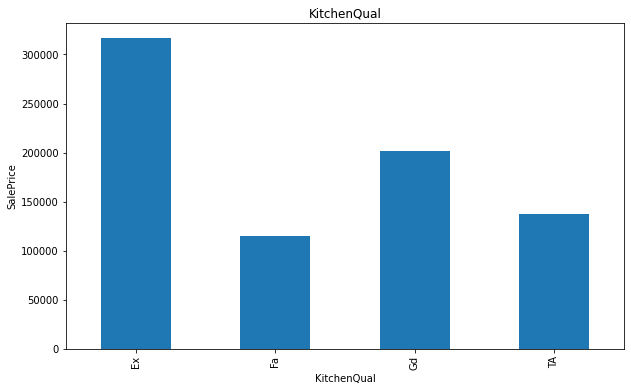

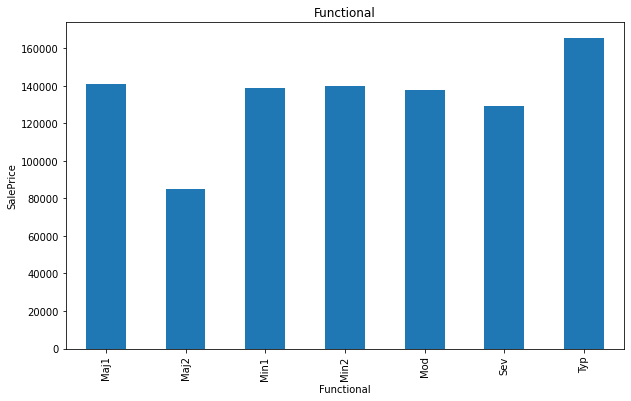

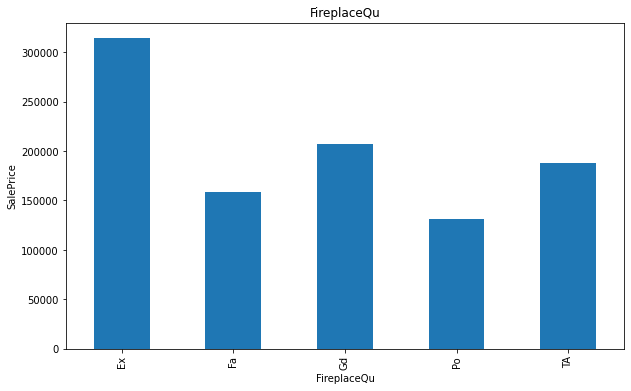

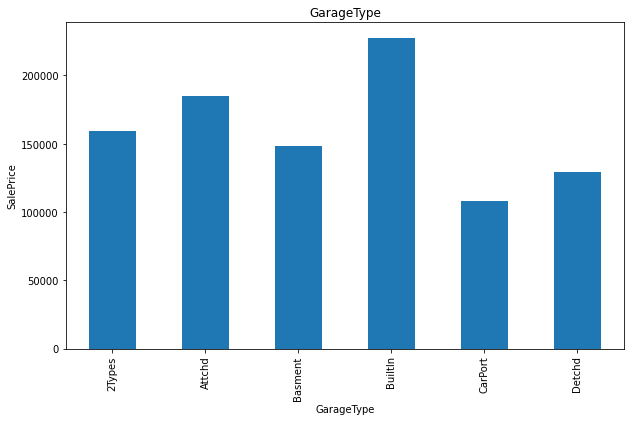

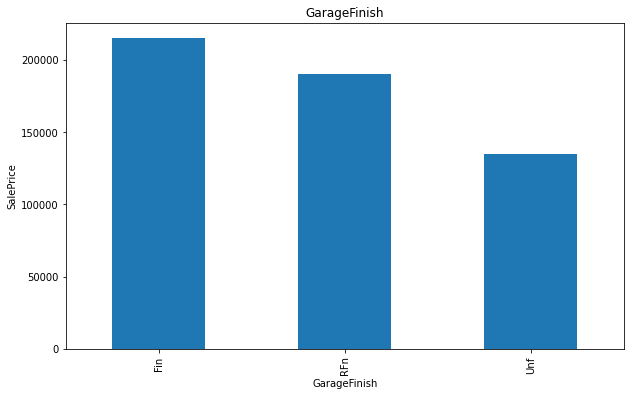

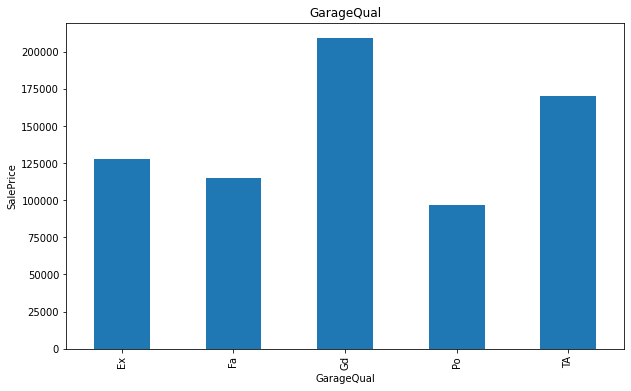

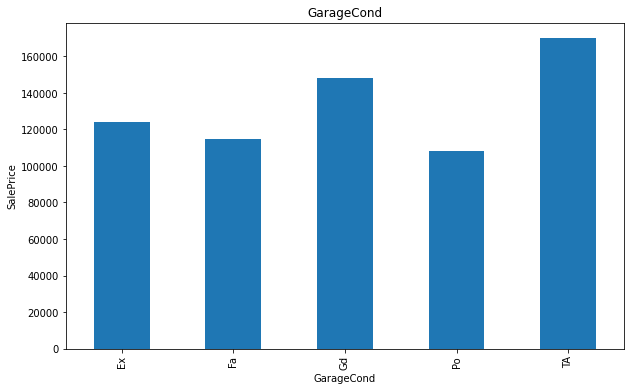

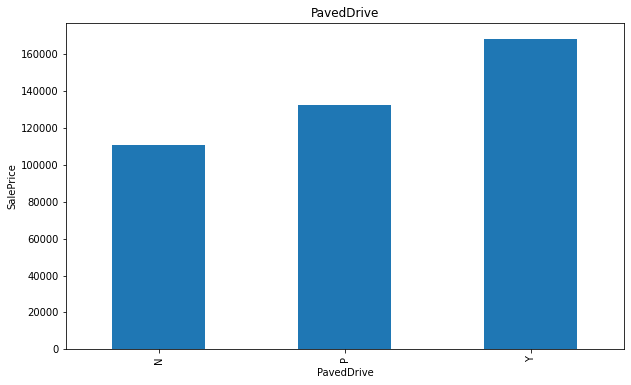

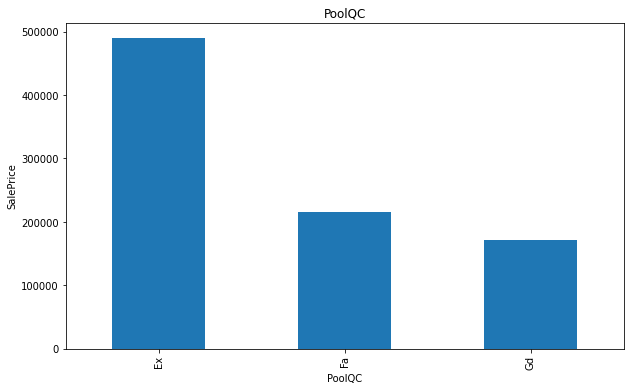

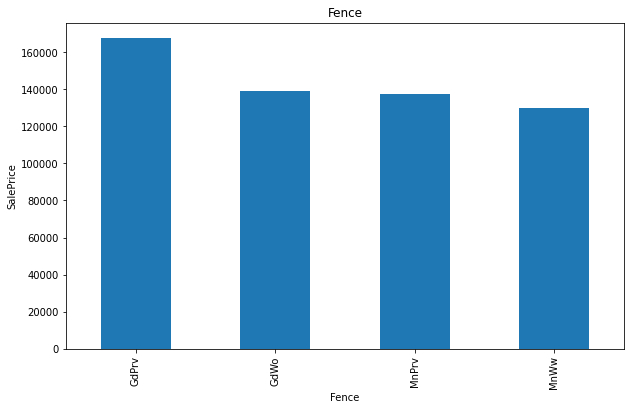

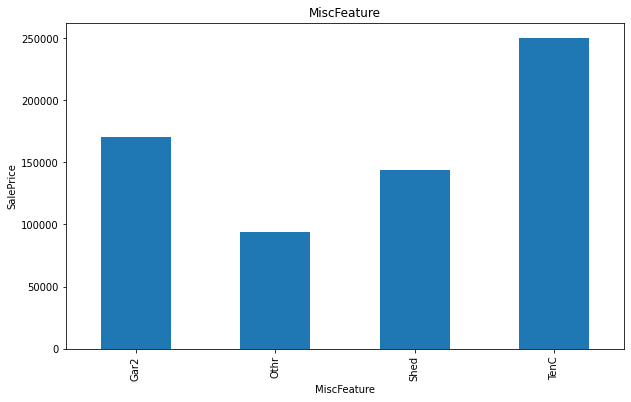

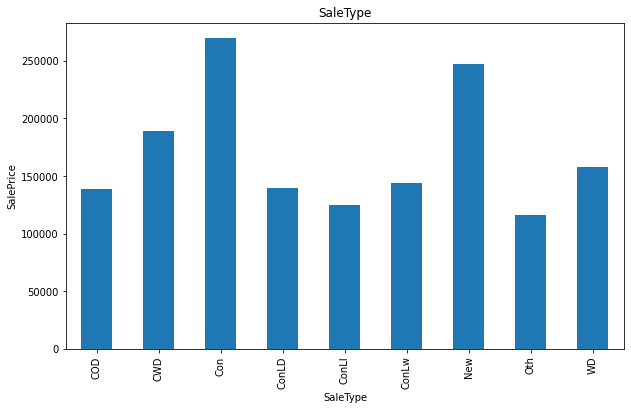

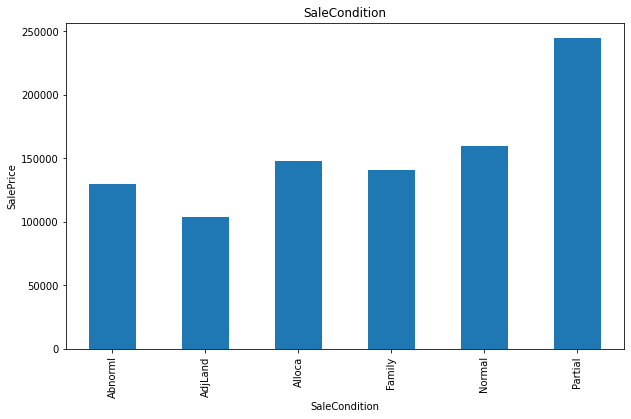

In [30]:
#Plot to analyze realtionship b/w each categorical features and our dependent variable 'Sale Price'
dataset = data.copy()

for feature in categorical_features:
    plt.figure(figsize=(10,6))
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()